<a href="https://colab.research.google.com/github/hbeck118/GIS/blob/main/ps3_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Goals and Research Questions

The goal of my project is to gain a deeper understanding of immigration to Germany. The first part of my project focuses on the situation in Germany, exploring how the foreign born population is distributed throughout Germany and in what areas the biggest changes in the foreign born population have been over the past 10 years. I also want to understand more about the reception of immigrants in Germany, by mapping support for the far right anti-immigrant political party Alternative für Deutschland (AFD) as well as the results of a study from 2015 analyzing the support for xenophobic statements throughout the different states in Germany. To further understand the views of people in Germany regarding immigrants, I am also mapping the economic situation, using data on income as well as income support payments. The research question I am aiming to answer with this work is this:

What is the relationship between the concentration of immigrants throughout Germany, the rate of change in the immigrant population, and the political and anti-immigrant attitudes in those areas? How are such attitudes impacted by economic factors such as income and social support payments?

The second part of my project focuses on the relationship between Germany and the origin countries of immigrants. I am mapping the top 38 origin countries and how many people from these countries live in Germany as of 2023, as well as how much money has been sent from Germany to other countries in the form of remittances in 2021. I chose to map these two factors to attempt to answer the following question:

Where do most immigrants in Germany come from and what countries receive the highest payments in form of remittances? Are countries with the highest numbers of people living in Germany also the ones receiving remittances from Germany?

#Set Up

In [1]:
!pip install geopandas==1.0.1

In [2]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [3]:
#!python --version
gpd.__version__

'1.0.1'

In [4]:
!pip install mapclassify
import mapclassify #need for thematic map classification

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.0 MB/s eta 0:00:00


#Mapping Situation in Germany

###Change in Foreign Born Population

In [ ]:
#Shapefile of counties from https://data.opendatasoft.com/explore/dataset/georef-germany-kreis%40public/export/?disjunctive.lan_code&disjunctive.lan_name&disjunctive.krs_code&disjunctive.krs_name&disjunctive.krs_name_short
! wget -q -O germany_counties.zip https://docs.google.com/uc?id=12_vFQomIzk5D9VpAgsf8aeBpl5ONXfij&export=download

zip_ref = zipfile.ZipFile('germany_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close()
ger0=gpd.read_file('georef-germany-kreis-millesime.shp')

In [ ]:
ger0.columns

Index(['year', 'lan_code', 'lan_name', 'krs_code', 'krs_name', 'krs_area_co',
       'krs_type', 'krs_name_sh', 'geometry'],
      dtype='object')

In [ ]:
ger0['krs_name']

0                  ['Landkreis Peine']
1      ['Kreisfreie Stadt Leverkusen']
2          ['Kreis Ennepe-Ruhr-Kreis']
3           ['Kreis Märkischer Kreis']
4              ['Landkreis Ahrweiler']
                    ...               
395             ['Landkreis Augsburg']
396     ['Landkreis Vorpommern-Rügen']
397              ['Landkreis Zwickau']
398              ['Landkreis Görlitz']
399            ['Landkreis Sonneberg']
Name: krs_name, Length: 400, dtype: object

In [ ]:
ger0['krs_code']

0      ['03157']
1      ['05316']
2      ['05954']
3      ['05962']
4      ['07131']
         ...    
395    ['09772']
396    ['13073']
397    ['14524']
398    ['14626']
399    ['16072']
Name: krs_code, Length: 400, dtype: object

In [ ]:
#trying to remove square brackets and quotation marks from county codes
#code from https://stackoverflow.com/questions/38147447/how-to-remove-square-bracket-from-pandas-dataframe
ger0['krs_code'] = ger0['krs_code'].str.strip('[]')
ger0['county_code'] = ger0['krs_code'].str.replace("'", "")

In [ ]:
ger0['county_code']

0      03157
1      05316
2      05954
3      05962
4      07131
       ...  
395    09772
396    13073
397    14524
398    14626
399    16072
Name: county_code, Length: 400, dtype: object

In [ ]:
#importing data on foreign born population in Germany in 2023 from https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/ link next to table, tab name csv-12521-12
gerfb23=pd.read_excel('https://docs.google.com/uc?id=1V6ZoC0HvmVnGKbnXj98IE3QvCKNKNFfg&export=download')

In [ ]:
gerfb23.head(5)

Statistik_Code      Statistik_Label    Stichtag  \
0           12521  Auslaenderstatistik  31.12.2023   
1           12521  Auslaenderstatistik  31.12.2023   
2           12521  Auslaenderstatistik  31.12.2023   
3           12521  Auslaenderstatistik  31.12.2023   
4           12521  Auslaenderstatistik  31.12.2023   

                                              Region  \
0  Deutschland                                   ...   
1  Schleswig-Holstein                            ...   
2  Flensburg_Stadt                               ...   
3  Kiel_Stadt                                    ...   
4  Luebeck_Stadt                                 ...   

                                           AGS_Kreis  \
0  Kein_AGS                                      ...   
1  Kein_AGS                                      ...   
2  01001                                         ...   
3  01002                                         ...   
4  01003                                         ...   

   Geschlecht_Insgesamt_Anzahl  Geschlecht_Maennlich_Anzahl  \
0                     13895865                      7305525   
1                       346690                       181990   
2                        19020                        10310   
3                        36755                        18990   
4                        31770                        16370   

   Geschlecht_Weiblich_Anzahl  Staatsangehoerigkeit_EU-Staaten_Anzahl  \
0                     6590340                                 5113875   
1                      164700                                  107365   
2                        8710                                    8005   
3                       17770                                    7715   
4                       15400                                    9160   

   Staatsangehoerigkeit_EU-Drittstaaten_Anzahl  Alter_unter_6_Anzahl  \
0                                      8781990                748770   
1                                       239325                 22015   
2                                        11015                  1335   
3                                        29040                  2420   
4                                        22610                  1715   

   Alter_6_und_mehr_Anzahl  Alter_unter_18_Anzahl  Alter_18_und_mehr_Anzahl  \
0                 13147095                2360060                  11535805   
1                   324675                  70625                    276065   
2                    17685                   3800                     15225   
3                    34340                   7295                     29460   
4                    30060                   5530                     26240   

   Alter_unter_15_Anzahl  Alter_15_bis_unter_65_Anzahl  \
0                1971880                      10668475   
1                  58630                        259355   
2                   3120                         14530   
3                   6090                         27605   
4                   4600                         23910   

   Alter_65_und_mehr_Anzahl  
0                   1255510  
1                     28705  
2                      1370  
3                      3060  
4                      3265

In [ ]:
gerfb23_1=gerfb23[['Region', 'AGS_Kreis', 'Geschlecht_Insgesamt_Anzahl']]

In [ ]:
gerfb23_2 = gerfb23_1.rename(columns={'AGS_Kreis': 'county_code', 'Geschlecht_Insgesamt_Anzahl': 'Total Foreign Born 2023'})

In [ ]:
gerfb23_2['county_code']=gerfb23_2['county_code'].str.strip()

In [ ]:
#import data of foreign born population per county in 2013 from https://www-genesis.destatis.de/genesis/online?operation=abruftabelleBearbeiten&levelindex=2&levelid=1729966389873&auswahloperation=abruftabelleAuspraegungAuswaehlen&auswahlverzeichnis=ordnungsstruktur&auswahlziel=werteabruf&code=12521-0040&auswahltext=&werteabruf=Werteabruf#abreadcrumb
gerfb13= pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/foreign_born_ger_2013.xlsx')

In [ ]:
gerfb13.head(5)

county_code                        County    Men Women Total Foreign Born 
0       01001   Flensburg, kreisfreie Stadt   3969  3596                7565
1       01002        Kiel, kreisfreie Stadt  10172  9836               20008
2       01003      Lübeck, kreisfreie Stadt   9098  8651               17749
3       01004  Neumünster, kreisfreie Stadt   2941  2639                5580
4       01051       Dithmarschen, Landkreis   2375  2263                4638

In [ ]:
gerfb13_1=gerfb13[['county_code', 'County', 'Total Foreign Born ']]

In [ ]:
gerfb13_2 = gerfb13_1.rename(columns={'Total Foreign Born ': 'Total Foreign Born 2013'})

In [ ]:
#merging datasets to calculate change in percentage
fb23_13 = pd.merge(gerfb23_2, gerfb13_2, on='county_code', how='outer', indicator=True)
fb23_13[['county_code' ,'Total Foreign Born 2023', 'Total Foreign Born 2013','_merge']]

county_code  \
0                                                01001   
1                                                01002   
2                                                01003   
3                                                01004   
4                                                01051   
..                                                 ...   
542  einer Ausländerbehörde bearbeitet und können d...   
543                       getrennt ausgewiesen werden.   
544  © Statistisches Bundesamt (Destatis), 2024 | S...   
545                                                NaN   
546                                                NaN   

     Total Foreign Born 2023 Total Foreign Born 2013      _merge  
0                    19020.0                    7565        both  
1                    36755.0                   20008        both  
2                    31770.0                   17749        both  
3                    14760.0                    5580        both  
4                    12520.0                    4638        both  
..                       ...                     ...         ...  
542                      NaN                     NaN  right_only  
543                      NaN                     NaN  right_only  
544                      NaN                     NaN  right_only  
545                      NaN                     NaN  right_only  
546                      NaN                     NaN  right_only  

[547 rows x 4 columns]

In [ ]:
fb23_13['Total Foreign Born 2013'] = pd.to_numeric(fb23_13['Total Foreign Born 2013'], errors='coerce')


In [ ]:
fb23_13.dtypes

Region                       object
county_code                  object
Total Foreign Born 2023     float64
County                       object
Total Foreign Born 2013     float64
_merge                     category
dtype: object

In [ ]:
#calculating the percentage of how much foreign born population has increased between 2013 and 2023
fb23_13['fb_change'] = ((fb23_13['Total Foreign Born 2023'] - fb23_13['Total Foreign Born 2013']) / fb23_13['Total Foreign Born 2013']) * 100

In [ ]:
fb23_13.head(15)

Region county_code  \
0   Flensburg_Stadt                               ...       01001   
1   Kiel_Stadt                                    ...       01002   
2   Luebeck_Stadt                                 ...       01003   
3   Neumuenster_Stadt                             ...       01004   
4   Dithmarschen                                  ...       01051   
5   Herzogtum_Lauenburg                           ...       01053   
6   Nordfriesland                                 ...       01054   
7   Ostholstein                                   ...       01055   
8   Pinneberg                                     ...       01056   
9   Ploen                                         ...       01057   
10  Rendsburg-Eckernfoerde                        ...       01058   
11  Schleswig-Flensburg                           ...       01059   
12  Segeberg                                      ...       01060   
13  Steinburg                                     ...       01061   
14  Stormarn                                      ...       01062   

    Total Foreign Born 2023                            County  \
0                   19020.0       Flensburg, kreisfreie Stadt   
1                   36755.0            Kiel, kreisfreie Stadt   
2                   31770.0          Lübeck, kreisfreie Stadt   
3                   14760.0      Neumünster, kreisfreie Stadt   
4                   12520.0           Dithmarschen, Landkreis   
5                   22710.0    Herzogtum Lauenburg, Landkreis   
6                   17795.0          Nordfriesland, Landkreis   
7                   17445.0            Ostholstein, Landkreis   
8                   49745.0              Pinneberg, Landkreis   
9                    8705.0                   Plön, Landkreis   
10                  22095.0  Rendsburg-Eckernförde, Landkreis   
11                  15825.0    Schleswig-Flensburg, Landkreis   
12                  38210.0               Segeberg, Landkreis   
13                  13095.0              Steinburg, Landkreis   
14                  26240.0               Stormarn, Landkreis   

    Total Foreign Born 2013 _merge   fb_change  
0                    7565.0   both  151.421018  
1                   20008.0   both   83.701519  
2                   17749.0   both   78.996000  
3                    5580.0   both  164.516129  
4                    4638.0   both  169.943941  
5                    9710.0   both  133.882595  
6                    6271.0   both  183.766544  
7                    7014.0   both  148.716852  
8                   24630.0   both  101.969143  
9                    3326.0   both  161.725797  
10                   7315.0   both  202.050581  
11                   6218.0   both  154.503056  
12                  14734.0   both  159.332157  
13                   4951.0   both  164.492022  
14                  11448.0   both  129.210342

array([[<Axes: title={'center': 'fb_change'}>]], dtype=object)

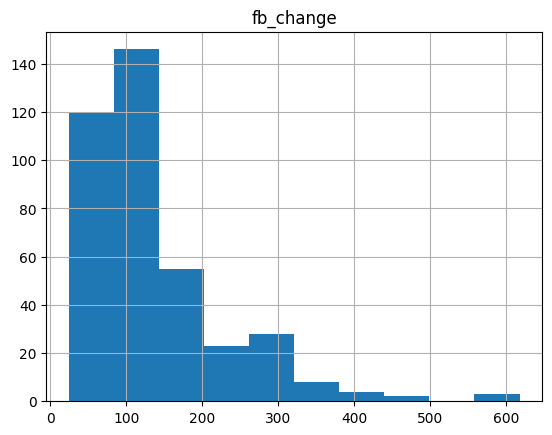

In [ ]:
fb23_13.hist('fb_change')

In [ ]:
gerfb_change = pd.merge(ger0, fb23_13, on='county_code',how='outer',indicator='merge')
gerfb_change[['Region','county_code','merge', 'fb_change']]

gerfb_change_final = pd.merge(ger0, fb23_13, on='county_code',how='inner',indicator=False)

Region  \
0    Flensburg_Stadt                               ...   
1    Kiel_Stadt                                    ...   
2    Luebeck_Stadt                                 ...   
3    Neumuenster_Stadt                             ...   
4    Dithmarschen                                  ...   
..                                                 ...   
542                                                NaN   
543                                                NaN   
544                                                NaN   
545                                                NaN   
546                                                NaN   

                                           county_code       merge   fb_change  
0                                                01001        both  151.421018  
1                                                01002        both   83.701519  
2                                                01003        both   78.996000  
3                                                01004        both  164.516129  
4                                                01051        both  169.943941  
..                                                 ...         ...         ...  
542  einer Ausländerbehörde bearbeitet und können d...  right_only         NaN  
543                       getrennt ausgewiesen werden.  right_only         NaN  
544  © Statistisches Bundesamt (Destatis), 2024 | S...  right_only         NaN  
545                                                NaN  right_only         NaN  
546                                                NaN  right_only         NaN  

[547 rows x 4 columns]

<Axes: >

[]

[]

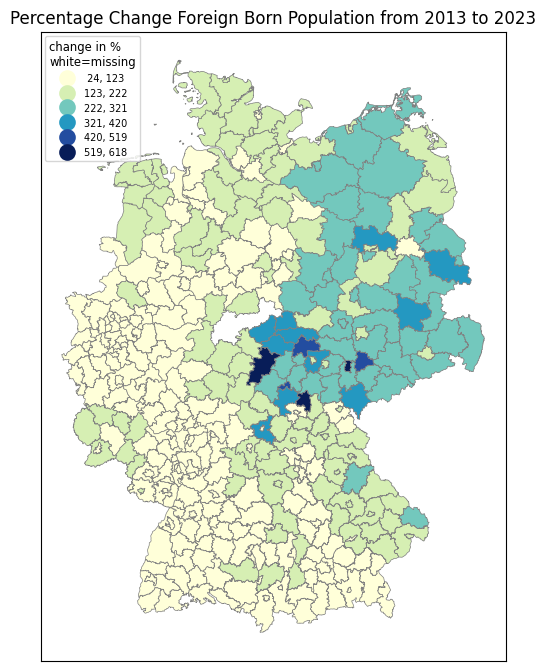

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
gerfb_change_final.plot(ax=ax,column='fb_change',legend=True,cmap='YlGnBu',
          scheme="equal_interval", k=6, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
leg1 = ax.get_legend()
leg1.set_title('''change in % \nwhite=missing''')

ax.title.set_text("Percentage Change Foreign Born Population from 2013 to 2023")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

In [ ]:
#importing data on asylum seekers in 2023 and 2013 from https://www-genesis.destatis.de/genesis//online?operation=table&code=12531-0020&bypass=true&levelindex=1&levelid=1730037559054#abreadcrumb
geras23=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/asylum_seekers_23.xlsx')
geras13=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/asylum_seekers_2013.xlsx')

In [ ]:
geras23.head(5)

Bundesländer\n Geschlecht  Number in 2023
0  Baden-Württemberg   männlich        205995.0
1  Baden-Württemberg   weiblich        163805.0
2  Baden-Württemberg  Insgesamt        369800.0
3             Bayern   männlich        213360.0
4             Bayern   weiblich        171330.0

In [ ]:
geras13.head(5)

Bundesländer\n Geschlecht  Number in 2013
0  Baden-Württemberg   männlich         45930.0
1  Baden-Württemberg   weiblich         30140.0
2  Baden-Württemberg  Insgesamt         76070.0
3             Bayern   männlich         46245.0
4             Bayern   weiblich         28540.0

In [ ]:
#limiting dataset to only rows that have total number ('Insgesamt')
geras23_total = geras23[geras23['Geschlecht'] == 'Insgesamt']
geras13_total = geras13[geras13['Geschlecht'] == 'Insgesamt']

In [ ]:
geras23_total.head(5)

Bundesländer\n Geschlecht  Number in 2023
2   Baden-Württemberg  Insgesamt        369800.0
5              Bayern  Insgesamt        384690.0
8              Berlin  Insgesamt        191535.0
11        Brandenburg  Insgesamt         75815.0
14             Bremen  Insgesamt         44410.0

In [ ]:
geras13_total.head(5)

Bundesländer\n Geschlecht  Number in 2013
2   Baden-Württemberg  Insgesamt         76070.0
5              Bayern  Insgesamt         74785.0
8              Berlin  Insgesamt         37555.0
11        Brandenburg  Insgesamt          9420.0
14             Bremen  Insgesamt          8205.0

In [ ]:
geras23_total.columns = geras23_total.columns.str.strip()
geras13_total.columns = geras13_total.columns.str.strip()

In [ ]:
#merging datasets to calculate change in percentage
as23_13 = pd.merge(geras23_total, geras13_total, on='Bundesländer', how='outer', indicator=True)
as23_13[['Bundesländer' ,'Number in 2023', 'Number in 2013','_merge']]

Bundesländer  Number in 2023  Number in 2013 _merge
0        Baden-Württemberg        369800.0         76070.0   both
1                   Bayern        384690.0         74785.0   both
2                   Berlin        191535.0         37555.0   both
3              Brandenburg         75815.0          9420.0   both
4                   Bremen         44410.0          8205.0   both
5                  Hamburg         94880.0         26050.0   both
6                   Hessen        270660.0         56900.0   both
7   Mecklenburg-Vorpommern         49980.0          7835.0   both
8            Niedersachsen        337300.0         63970.0   both
9      Nordrhein-Westfalen        779785.0        166575.0   both
10         Rheinland-Pfalz        138035.0         24710.0   both
11                Saarland         51665.0          7645.0   both
12                 Sachsen        130915.0         16995.0   both
13          Sachsen-Anhalt         74630.0         11625.0   both
14      Schleswig-Holstein        111215.0         17265.0   both
15               Thüringen         67820.0          8320.0   both

In [ ]:
as23_13['as_change'] = ((as23_13['Number in 2023'] - as23_13['Number in 2013']) / as23_13['Number in 2013']) * 100

array([[<Axes: title={'center': 'as_change'}>]], dtype=object)

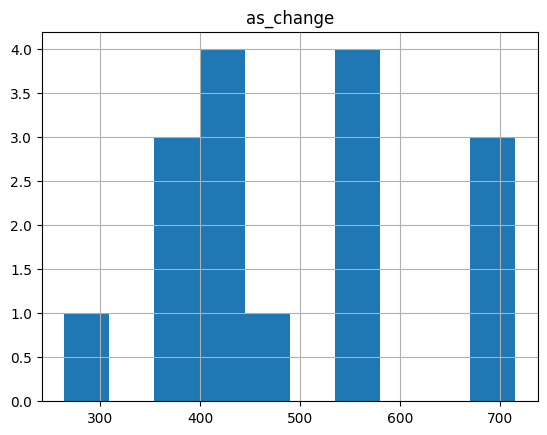

In [ ]:
as23_13.hist('as_change')

In [ ]:
#getting germany shapefile with just the states from https://regionalatlas.statistikportal.de/#
! wget -q -O germany_states.zip https://raw.githubusercontent.com/hbeck118/GIS/main/B-2021-AI016-1--AI1601--2024-10-27.zip

zip_ref = zipfile.ZipFile('germany_states.zip', 'r'); zip_ref.extractall(); zip_ref.close()
ger1=gpd.read_file('B-2021-AI016-1--AI1601--2024-10-27.shp')

<Axes: >

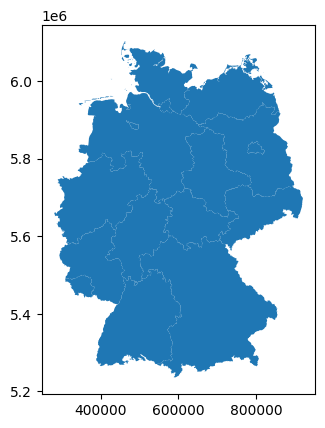

In [ ]:
ger1.plot()

In [ ]:
ger1.columns

Index(['id', 'schluessel', 'gen', 'jahr', 'ai1601', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [ ]:
ger1['gen']

0         Schleswig-Holstein
1                    Hamburg
2              Niedersachsen
3                     Bremen
4        Nordrhein-Westfalen
5                     Hessen
6            Rheinland-Pfalz
7          Baden-Württemberg
8                     Bayern
9                   Saarland
10                    Berlin
11               Brandenburg
12    Mecklenburg-Vorpommern
13                   Sachsen
14            Sachsen-Anhalt
15                 Thüringen
Name: gen, dtype: object

In [ ]:
ger1=ger1.rename(columns={'gen':'Bundesländer'})

In [ ]:
#merging the change in asylum seekers over the years with the state shapefile
geras_change = pd.merge(ger1, as23_13, on='Bundesländer',how='outer',indicator='merge')
geras_change[['Bundesländer','merge', 'as_change']]

geras_change_final = pd.merge(ger1, as23_13, on='Bundesländer',how='inner',indicator=False)

Bundesländer merge   as_change
0        Baden-Württemberg  both  386.131195
1                   Bayern  both  414.394598
2                   Berlin  both  410.011982
3              Brandenburg  both  704.830149
4                   Bremen  both  441.255332
5                  Hamburg  both  264.222649
6                   Hessen  both  375.676626
7   Mecklenburg-Vorpommern  both  537.906828
8            Niedersachsen  both  427.278412
9      Nordrhein-Westfalen  both  368.128471
10         Rheinland-Pfalz  both  458.619992
11                Saarland  both  575.801177
12                 Sachsen  both  670.314798
13          Sachsen-Anhalt  both  541.978495
14      Schleswig-Holstein  both  544.164495
15               Thüringen  both  715.144231

<Axes: >

[]

[]

([Text(574857.5862010963, 6016285.984100916, 'Schleswig-Holstein'),
  Text(591582.2163353614, 5945775.987659408, 'Hamburg'),
  Text(561483.6493123663, 5838483.530761331, 'Niedersachsen'),
  Text(501110.0880414926, 5906559.701282016, 'Bremen'),
  Text(399578.37176985503, 5713815.200032481, 'Nordrhein-Westfalen'),
  Text(513975.5607037855, 5615118.269553685, 'Hessen'),
  Text(413109.11408018926, 5542031.2378407465, 'Rheinland-Pfalz'),
  Text(504589.1984999303, 5386361.503529338, 'Baden-Württemberg'),
  Text(689950.8819040508, 5433303.290861244, 'Bayern'),
  Text(328723.21685442136, 5464611.6492109345, 'Saarland'),
  Text(809265.4773168579, 5847159.636287477, 'Berlin'),
  Text(856802.4192650862, 5824998.43552734, 'Brandenburg'),
  Text(729830.0251532064, 5971837.390960593, 'Mecklenburg-Vorpommern'),
  Text(815129.0908504288, 5674568.151513794, 'Sachsen'),
  Text(690046.8123321543, 5775347.848861445, 'Sachsen-Anhalt'),
  Text(653117.8194793192, 5650894.955123185, 'Thüringen')],
 [])

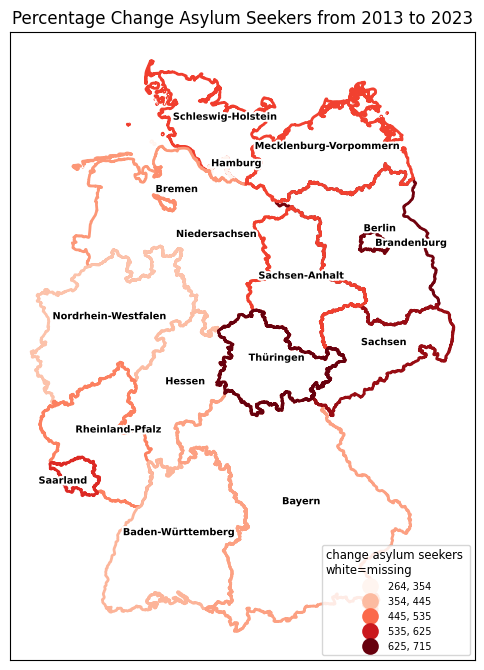

In [ ]:
#code fore edgecolors from Gemini AI
#code for label adjustment adapted from AOK's swbPopGroBrfss.ipynb and chatGPT
!pip install adjustText
from adjustText import adjust_text

import matplotlib.colors as mcolors
fig, ax = plt.subplots(1, figsize=(6, 10))


norm = mcolors.Normalize(vmin=geras_change_final['as_change'].min(),
                         vmax=geras_change_final['as_change'].max())


edgecolors = plt.cm.Reds(norm(geras_change_final['as_change'].values))

geras_change_final.plot(ax=ax, column='as_change', legend=True, cmap='Reds',
          scheme="equal_interval", k=5, edgecolor=edgecolors, linewidth=2, facecolor="none",
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.2, 'title_fontsize': 'small', 'fontsize': '7'})
leg1 = ax.get_legend()
leg1.set_title('''change asylum seekers \nwhite=missing''')

ax.title.set_text("Percentage Change Asylum Seekers from 2013 to 2023")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
from matplotlib.patheffects import withStroke
centroids = ger1.geometry.centroid
texts = []
for idx, row in ger1.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    if row['Bundesländer'] == 'Brandenburg':
        y_offset = -0.1
    else:
        y_offset = 0


    text = ax.text(x, y + y_offset, row['Bundesländer'], ha='center', fontsize=7, color='black', fontweight='bold', path_effects=[withStroke(linewidth=3, foreground='white')])
    texts.append(text)
adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'})

<Axes: >

[]

[]

<Axes: title={'center': 'Percentage Change Foreign Born Population from 2013 to 2023'}>

[]

[]

([Text(574857.5862010963, 6016285.984100917, 'Schleswig-Holstein'),
  Text(591582.2163353614, 5945775.987659409, 'Hamburg'),
  Text(561483.6493123663, 5838483.530761331, 'Niedersachsen'),
  Text(501110.0880414926, 5906559.701282017, 'Bremen'),
  Text(399578.37176985503, 5713815.200032481, 'Nordrhein-Westfalen'),
  Text(513975.5607037855, 5615118.269553686, 'Hessen'),
  Text(413109.11408018926, 5542031.2378407465, 'Rheinland-Pfalz'),
  Text(504589.1984999303, 5386361.503529339, 'Baden-Württemberg'),
  Text(689950.8819040508, 5433303.290861244, 'Bayern'),
  Text(328723.21685442136, 5464611.649210935, 'Saarland'),
  Text(809265.4773168579, 5847159.636287477, 'Berlin'),
  Text(856802.4192650862, 5824998.4355273405, 'Brandenburg'),
  Text(729830.0251532064, 5971837.390960594, 'Mecklenburg-Vorpommern'),
  Text(815129.0908504288, 5674568.151513795, 'Sachsen'),
  Text(690046.8123321543, 5775347.848861445, 'Sachsen-Anhalt'),
  Text(653117.8194793192, 5650894.955123185, 'Thüringen')],
 [])

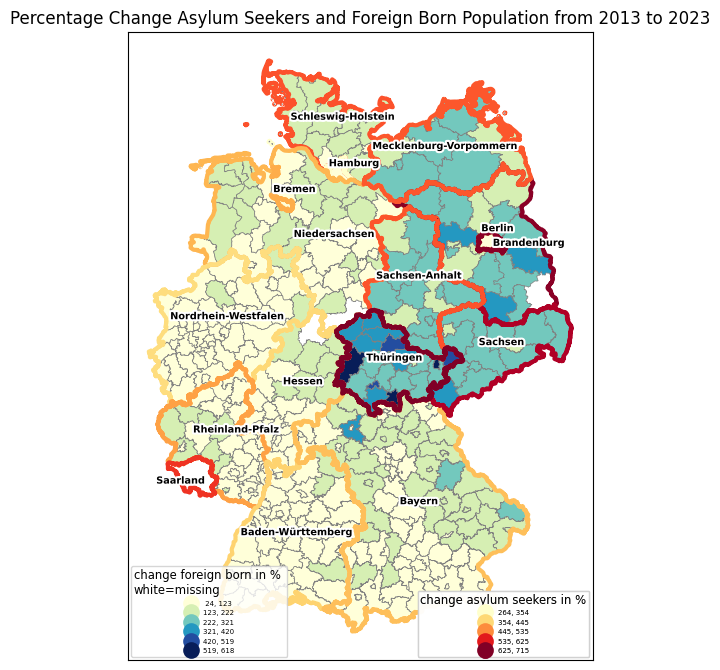

In [ ]:
#code for two legends from the AOK's map.ipynb

if gerfb_change_final.crs != geras_change_final.crs:
    gerfb_change_final = gerfb_change_final.to_crs(geras_change_final.crs)


fig, ax = plt.subplots(1, figsize=(6,10))
gerfb_change_final.plot(ax=ax,column='fb_change',legend=True,cmap='YlGnBu',
          scheme="equal_interval", k=6, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'5', 'title': 'change in % \nwhite=missing'})
l1 = ax.get_legend()
l1.set_title('''change foreign born in % \nwhite=missing''')

ax.title.set_text("Percentage Change Foreign Born Population from 2013 to 2023")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

#code fore edgecolors from Gemini AI

import matplotlib.colors as mcolors


norm = mcolors.Normalize(vmin=geras_change_final['as_change'].min(),
                         vmax=geras_change_final['as_change'].max())


edgecolors = plt.cm.YlOrRd(norm(geras_change_final['as_change'].values))

geras_change_final.plot(ax=ax, column='as_change', legend=True, cmap='YlOrRd',
          scheme="equal_interval", k=5, edgecolor=edgecolors, linewidth=3, facecolor="none",
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.2, 'title_fontsize': 'small', 'fontsize': '5', 'title': 'change asylum seekers in % \nwhite=missing'})

l2 = ax.get_legend()
l2.set_title('''change asylum seekers in %''')

ax.title.set_text("Percentage Change Asylum Seekers and Foreign Born Population from 2013 to 2023")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
from matplotlib.patheffects import withStroke
centroids = ger1.geometry.centroid
texts = []
for idx, row in ger1.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    if row['Bundesländer'] == 'Brandenburg':
        y_offset = -0.1
    else:
        y_offset = 0


    text = ax.text(x, y + y_offset, row['Bundesländer'], ha='center', fontsize=7, color='black', fontweight='bold', path_effects=[withStroke(linewidth=3, foreground='white')])
    texts.append(text)
adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'})

ax.add_artist(l2)
ax.add_artist(l1)

###Political Climate

In [ ]:
#Shapefile of constituencies from https://www.bundeswahlleiterin.de/bundestagswahlen/2017/wahlkreiseinteilung/downloads.html
! wget -q -O germany_votes.zip https://docs.google.com/uc?id=1g6ZTdJGthLUkgvpLCSwYfOgEhT1EUdO8&export=download

zip_ref = zipfile.ZipFile('germany_votes.zip', 'r'); zip_ref.extractall(); zip_ref.close()
ger_votes=gpd.read_file('Geometrie_Wahlkreise_19DBT_VG250.shp')

<Axes: >

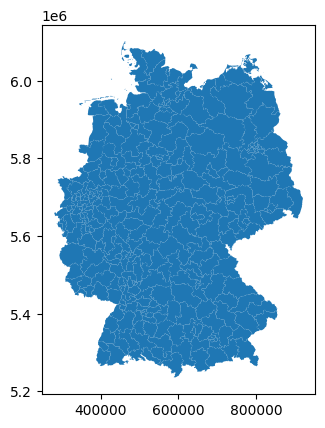

In [ ]:
ger_votes.plot()

In [ ]:
ger_votes['WKR_NR']

0        1
1        2
2        3
3        4
4        5
      ... 
294    295
295    296
296    297
297    298
298    299
Name: WKR_NR, Length: 299, dtype: int32

In [ ]:
#importing election results of last general election in 2021 from https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html
ger_er=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/wahlergebnisse_2021.xlsx')

In [ ]:
ger_er.head(5)

Bundestagswahl 2021 (Wiederholung in Teilen Berlins)             Unnamed: 1  \
0                              Amtliches Endergebnis                      NaN   
1                                                 Nr                   Gebiet   
2                                                NaN                      NaN   
3                                                NaN                      NaN   
4                                                  1    Flensburg – Schleswig   

  Unnamed: 2       Unnamed: 3  Unnamed: 4    Unnamed: 5  Unnamed: 6  \
0        NaN              NaN         NaN           NaN         NaN   
1  gehört zu  Wahlberechtigte         NaN           NaN         NaN   
2        NaN      Erststimmen         NaN  Zweitstimmen         NaN   
3        NaN        Endgültig  Vorperiode     Endgültig  Vorperiode   
4          1           231536      228471        231536      228471   

    Unnamed: 7  Unnamed: 8    Unnamed: 9  ...  Unnamed: 201 Unnamed: 202  \
0          NaN         NaN           NaN  ...           NaN          NaN   
1     Wählende         NaN           NaN  ...           NaN          NaN   
2  Erststimmen         NaN  Zweitstimmen  ...  Zweitstimmen          NaN   
3    Endgültig  Vorperiode     Endgültig  ...     Endgültig   Vorperiode   
4       180112      171914        180112  ...           NaN          NaN   

             Unnamed: 203 Unnamed: 204  Unnamed: 205 Unnamed: 206  \
0                     NaN          NaN           NaN          NaN   
1  Thüringer Heimatpartei          NaN           NaN          NaN   
2             Erststimmen          NaN  Zweitstimmen          NaN   
3               Endgültig   Vorperiode     Endgültig   Vorperiode   
4                     NaN          NaN           NaN          NaN   

  Unnamed: 207 Unnamed: 208  Unnamed: 209 Unnamed: 210  
0          NaN          NaN           NaN          NaN  
1       Übrige          NaN           NaN          NaN  
2  Erststimmen          NaN  Zweitstimmen          NaN  
3    Endgültig   Vorperiode     Endgültig   Vorperiode  
4          NaN          755           NaN          843  

[5 rows x 211 columns]

In [ ]:
#making row 1 the titles of the columns and dropping row 0
ger_results=ger_er.drop(0)
ger_results.columns = ger_results.iloc[0]

In [ ]:
ger_results.head(5)

1   Nr                             Gebiet  gehört zu  Wahlberechtigte  \
1   Nr                             Gebiet  gehört zu  Wahlberechtigte   
2  NaN                                NaN        NaN      Erststimmen   
3  NaN                                NaN        NaN        Endgültig   
4    1              Flensburg – Schleswig          1           231536   
5    2  Nordfriesland – Dithmarschen Nord          1           188267   

1         NaN           NaN         NaN     Wählende         NaN  \
1         NaN           NaN         NaN     Wählende         NaN   
2         NaN  Zweitstimmen         NaN  Erststimmen         NaN   
3  Vorperiode     Endgültig  Vorperiode    Endgültig  Vorperiode   
4      228471        231536      228471       180112      171914   
5      186568        188267      186568       145387      139194   

1           NaN  ...           NaN         NaN  Thüringer Heimatpartei  \
1           NaN  ...           NaN         NaN  Thüringer Heimatpartei   
2  Zweitstimmen  ...  Zweitstimmen         NaN             Erststimmen   
3     Endgültig  ...     Endgültig  Vorperiode               Endgültig   
4        180112  ...           NaN         NaN                     NaN   
5        145387  ...           NaN         NaN                     NaN   

1         NaN           NaN         NaN       Übrige         NaN  \
1         NaN           NaN         NaN       Übrige         NaN   
2         NaN  Zweitstimmen         NaN  Erststimmen         NaN   
3  Vorperiode     Endgültig  Vorperiode    Endgültig  Vorperiode   
4         NaN           NaN         NaN          NaN         755   
5         NaN           NaN         NaN          NaN           0   

1           NaN         NaN  
1           NaN         NaN  
2  Zweitstimmen         NaN  
3     Endgültig  Vorperiode  
4           NaN         843  
5           NaN         430  

[5 rows x 211 columns]

In [ ]:
#use only values in category "Zweitstimmen" (secondary votes) because those are considered to be the more relevant to a party, indicating support of the party not of a specific candidate https://www.bpb.de/mediathek/reihen/bundestagswahlen/599/erst-und-zweitstimme/
ger_afd=ger_results[['Nr','Gebiet','Alternative für Deutschland (zweitstimmen) ']]

In [ ]:
ger_afd2=ger_afd.drop(index=1).drop(index=2).drop(index=3)

In [ ]:
#dataset lists constituencies divided by state and ends each list with the name of the state
#all 16 state names are listed after the second duplicate of 1-16 in the 'Nr' column
#code from ChatGPT

duplicates = ger_afd2[ger_afd2.duplicated('Nr', keep='first')]

In [ ]:
duplicates

1     Nr                  Gebiet Alternative für Deutschland (zweitstimmen) 
15     1      Schleswig-Holstein                                      119566
23    13  Mecklenburg-Vorpommern                                      165342
24   NaN                     NaN                                         NaN
31     2                 Hamburg                                       50537
32   NaN                     NaN                                         NaN
63     3           Niedersachsen                                      336434
64   NaN                     NaN                                         NaN
67     4                  Bremen                                       22575
68   NaN                     NaN                                         NaN
79    12             Brandenburg                                      277412
80   NaN                     NaN                                         NaN
90    15          Sachsen-Anhalt                                      235492
91   NaN                     NaN                                         NaN
104   11                  Berlin                                      159025
105  NaN                     NaN                                         NaN
170    5     Nordrhein-Westfalen                                      717510
171  NaN                     NaN                                         NaN
188   14                 Sachsen                                      607044
189  NaN                     NaN                                         NaN
212    6                  Hessen                                      290978
213  NaN                     NaN                                         NaN
222   16               Thüringen                                      303233
223  NaN                     NaN                                         NaN
239    7         Rheinland-Pfalz                                      215205
240  NaN                     NaN                                         NaN
287    9                  Bayern                                      679915
288  NaN                     NaN                                         NaN
327    8       Baden-Württemberg                                      571336
328  NaN                     NaN                                         NaN
333   10                Saarland                                       57629
334  NaN                     NaN                                         NaN
335   99            Bundesgebiet                                     4809233

In [ ]:
#to get rid the state names from the list, I am dropping the second versions of all duplicates
#code from ChatGPT
ger_afd_3 = ger_afd2.drop_duplicates('Nr', keep='first')

In [ ]:
ger_afd_3.head(15)

1    Nr                                             Gebiet  \
4     1                              Flensburg – Schleswig   
5     2                  Nordfriesland – Dithmarschen Nord   
6     3                       Steinburg – Dithmarschen Süd   
7     4                              Rendsburg-Eckernförde   
8     5                                               Kiel   
9     6                                  Plön – Neumünster   
10    7                                          Pinneberg   
11    8                          Segeberg – Stormarn-Mitte   
12    9                        Ostholstein – Stormarn-Nord   
13   10                 Herzogtum Lauenburg – Stormarn-Süd   
14   11                                             Lübeck   
16  NaN                                                NaN   
17   12  Schwerin – Ludwigslust-Parchim I – Nordwestmec...   
18   13  Ludwigslust-Parchim II – Nordwestmecklenburg I...   
19   14                     Rostock – Landkreis Rostock II   

1  Alternative für Deutschland (zweitstimmen)   
4                                        10317  
5                                         8798  
6                                        11303  
7                                        10564  
8                                         7654  
9                                         9741  
10                                       13080  
11                                       14527  
12                                       10073  
13                                       14682  
14                                        8827  
16                                         NaN  
17                                       24185  
18                                       24673  
19                                       20658

In [ ]:
ger_afd4 = ger_afd_3.rename(columns={'Nr': 'WKR_NR'})

In [ ]:
ger_afd4['Alternative für Deutschland (zweitstimmen) '] = pd.to_numeric(ger_afd4['Alternative für Deutschland (zweitstimmen) '], errors='coerce')

In [ ]:
ger_afd4

1   WKR_NR                             Gebiet  \
4        1              Flensburg – Schleswig   
5        2  Nordfriesland – Dithmarschen Nord   
6        3       Steinburg – Dithmarschen Süd   
7        4              Rendsburg-Eckernförde   
8        5                               Kiel   
..     ...                                ...   
326    295           Zollernalb – Sigmaringen   
329    296                        Saarbrücken   
330    297                          Saarlouis   
331    298                         St. Wendel   
332    299                            Homburg   

1    Alternative für Deutschland (zweitstimmen)   
4                                        10317.0  
5                                         8798.0  
6                                        11303.0  
7                                        10564.0  
8                                         7654.0  
..                                           ...  
326                                      16477.0  
329                                      13006.0  
330                                      15651.0  
331                                      12904.0  
332                                      16068.0  

[300 rows x 3 columns]

In [ ]:
ger_afd5 = pd.merge(ger_afd4, ger_votes, on='WKR_NR',how='outer',indicator=True)
ger_afd5[['WKR_NR','Gebiet','Alternative für Deutschland (zweitstimmen) ','_merge']]

ger_afd_2021 = pd.merge(ger_afd4, ger_votes, on='WKR_NR',how='inner',indicator=False)

WKR_NR                             Gebiet  \
0        1              Flensburg – Schleswig   
1        2  Nordfriesland – Dithmarschen Nord   
2        3       Steinburg – Dithmarschen Süd   
3        4              Rendsburg-Eckernförde   
4        5                               Kiel   
..     ...                                ...   
295    296                        Saarbrücken   
296    297                          Saarlouis   
297    298                         St. Wendel   
298    299                            Homburg   
299    NaN                                NaN   

     Alternative für Deutschland (zweitstimmen)      _merge  
0                                        10317.0       both  
1                                         8798.0       both  
2                                        11303.0       both  
3                                        10564.0       both  
4                                         7654.0       both  
..                                           ...        ...  
295                                      13006.0       both  
296                                      15651.0       both  
297                                      12904.0       both  
298                                      16068.0       both  
299                                          NaN  left_only  

[300 rows x 4 columns]

In [ ]:
type(ger_afd_2021)

pandas.core.frame.DataFrame

In [ ]:
gdf = gpd.GeoDataFrame(ger_afd_2021)

<Axes: >

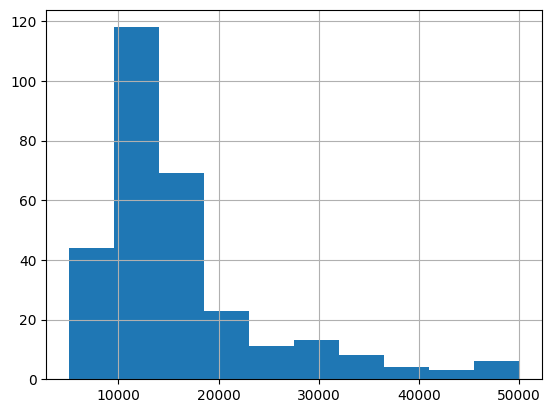

In [ ]:
ger_afd4['Alternative für Deutschland (zweitstimmen) '].hist(bins=10)

The histogram for this data is also skewed to the right with the highest concentration of votes for the AFD between 10,000 and 20,000. I identified three main classes that the distribution shows, 0-20,000, 20,000-40,000, and 40,000 to 60,000. To represent these classes on the map, I chose equal intervals.

<Axes: >

Text(0.5, 151.7224460393233, 'https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html')

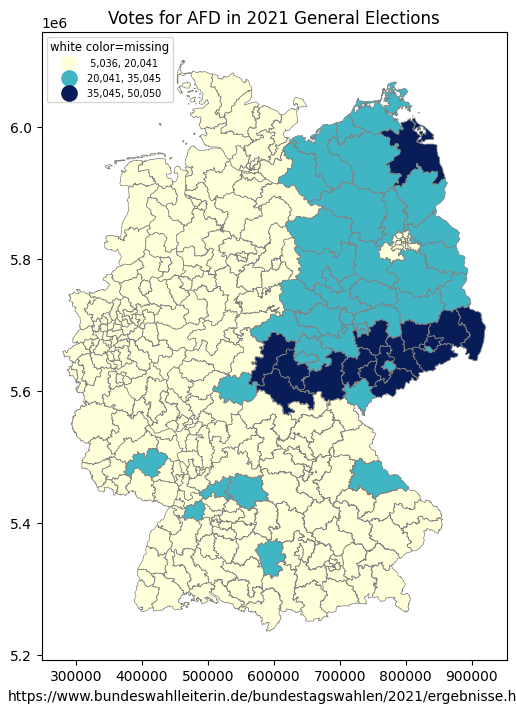

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
gdf.plot(ax=ax,column='Alternative für Deutschland (zweitstimmen) ',legend=True,cmap='YlGnBu',
                   scheme='equalinterval', k=3, edgecolor='grey',linewidth=0.5,
                   legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
leg1 = ax.get_legend()
leg1.set_title('''white color=missing''')
ax.title.set_text("Votes for AFD in 2021 General Elections")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html''')

In [ ]:
#importing data about percentage of people who support xenophobic statements from a 2015 study per Bundesland (state) from https://de.statista.com/statistik/daten/studie/425127/umfrage/zustimmung-zu-auslaenderfeindlichen-und-antisemitischen-thesen/
ger_xen=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/xenophobia.xlsx')

In [ ]:
ger_xen.head(5)

Anteil der Befragten, die ausländerfeindlichen bzw. antisemitischen Thesen zustimmen [nach Bundesländern]  \
0                                     Sachsen-Anhalt                                                          
1                                             Bayern                                                          
2                             Mecklenburg-Vorpommern                                                          
3                                          Thüringen                                                          
4                                        Brandenburg                                                          

   Ausländerfeindlichkeit (in prozent)  
0                                 42.2  
1                                 33.1  
2                                 32.8  
3                                 30.9  
4                                 29.6

In [ ]:
ger_xen=ger_xen.rename(columns={'Anteil der Befragten, die ausländerfeindlichen bzw. antisemitischen Thesen zustimmen [nach Bundesländern]':'Bundesländer'})

In [ ]:
ger_xen1 = pd.merge(ger1, ger_xen, on='Bundesländer',how='outer',indicator=True)
ger_xen1[['Bundesländer','_merge', 'Ausländerfeindlichkeit (in prozent)']]

ger_xen_final = pd.merge(ger1, ger_xen, on='Bundesländer',how='inner',indicator=False)

Bundesländer      _merge  Ausländerfeindlichkeit (in prozent)
0        Baden-Württemberg        both                                 16.9
1                   Bayern        both                                 33.1
2                   Berlin        both                                 21.6
3              Brandenburg        both                                 29.6
4                   Bremen   left_only                                  NaN
5              Deutschland  right_only                                 24.3
6                  Hamburg   left_only                                  NaN
7                   Hessen        both                                 23.2
8   Mecklenburg-Vorpommern        both                                 32.8
9            Niedersachsen        both                                 23.7
10     Nordrhein-Westfalen        both                                 20.2
11         Rheinland-Pfalz        both                                 15.1
12                Saarland   left_only                                  NaN
13                 Sachsen        both                                 25.0
14          Sachsen-Anhalt        both                                 42.2
15      Schleswig-Holstein        both                                 24.7
16               Thüringen        both                                 30.9

array([[<Axes: title={'center': 'Ausländerfeindlichkeit (in prozent)'}>]],
      dtype=object)

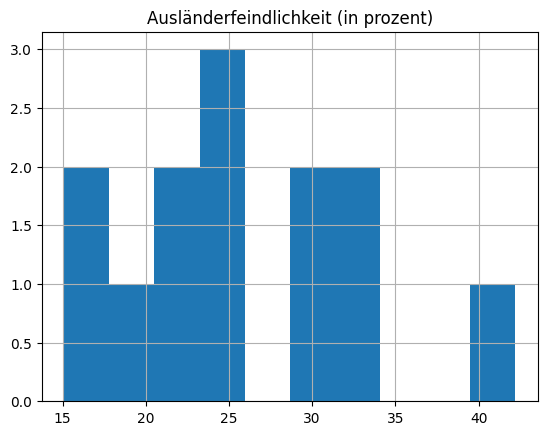

In [ ]:
ger_xen_final.hist('Ausländerfeindlichkeit (in prozent)')

<Axes: >

([Text(574857.5862010963, 6016285.984100916, 'Schleswig-Holstein'),
  Text(591582.2163353614, 5945775.987659408, 'Hamburg'),
  Text(561483.6493123663, 5838483.530761331, 'Niedersachsen'),
  Text(501110.0880414926, 5906559.701282016, 'Bremen'),
  Text(399578.37176985503, 5713815.200032481, 'Nordrhein-Westfalen'),
  Text(513975.5607037855, 5615118.269553685, 'Hessen'),
  Text(413109.11408018926, 5542031.2378407465, 'Rheinland-Pfalz'),
  Text(504589.1984999303, 5386361.503529338, 'Baden-Württemberg'),
  Text(689950.8819040508, 5433303.290861244, 'Bayern'),
  Text(328723.21685442136, 5464611.6492109345, 'Saarland'),
  Text(809265.4773168579, 5847159.636287477, 'Berlin'),
  Text(856802.4192650862, 5824998.43552734, 'Brandenburg'),
  Text(729830.0251532064, 5971837.390960593, 'Mecklenburg-Vorpommern'),
  Text(815129.0908504288, 5674568.151513794, 'Sachsen'),
  Text(690046.8123321543, 5775347.848861445, 'Sachsen-Anhalt'),
  Text(653117.8194793192, 5650894.955123185, 'Thüringen')],
 [])

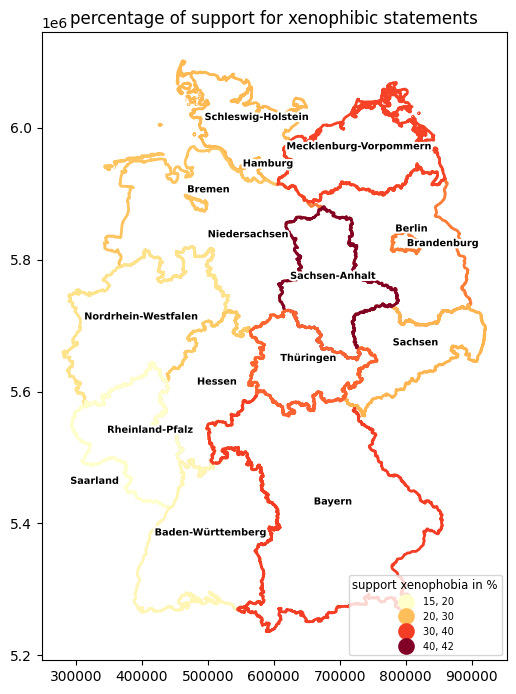

In [ ]:
#code for edgecolors from Gemini AI
import matplotlib.colors as mcolors
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(6, 10))


norm = mcolors.Normalize(vmin=ger_xen_final['Ausländerfeindlichkeit (in prozent)'].min(),
                         vmax=ger_xen_final['Ausländerfeindlichkeit (in prozent)'].max())


edgecolors = plt.cm.YlOrRd(norm(ger_xen_final['Ausländerfeindlichkeit (in prozent)'].values))

ger_xen_final.plot(ax=ax, column='Ausländerfeindlichkeit (in prozent)', legend=True, cmap='YlOrRd',
          scheme="user_defined", classification_kwds={'bins':[20, 30, 40]}, k=4, edgecolor=edgecolors, linewidth=2, facecolor="none",
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.2, 'title_fontsize': 'small', 'fontsize': '7'}, missing_kwds={'color': 'translucent','edgecolor': 'grey'})
leg1 = ax.get_legend()
leg1.set_title('''support xenophobia in %''')

ax.title.set_text("percentage of support for xenophibic statements")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks
#code to adjust labels adapted from AOK's swbPopGroBrfss.ipynb and chatGPT
!pip install adjustText
from adjustText import adjust_text
from matplotlib.patheffects import withStroke
centroids = ger1.geometry.centroid
texts = []
for idx, row in ger1.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    if row['Bundesländer'] == 'Brandenburg':
        y_offset = -0.1
    else:
        y_offset = 0


    text = ax.text(x, y + y_offset, row['Bundesländer'], ha='center', fontsize=7, color='black', fontweight='bold', path_effects=[withStroke(linewidth=3, foreground='white')])
    texts.append(text)
adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'})




<Axes: >

Text(0.5, 151.7224460393233, 'https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html\nhttps://de.statista.com/statistik/daten/studie/425127/umfrage/zustimmung-zu-auslaenderfeindlichen-und-antisemitischen-thesen/')

<Axes: title={'center': 'Votes for AFD in 2021 General Elections and Support of Xenophobic Statements'}, xlabel='https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html\nhttps://de.statista.com/statistik/daten/studie/425127/umfrage/zustimmung-zu-auslaenderfeindlichen-und-antisemitischen-thesen/'>

[]

[]

([Text(574857.5862010964, 6016285.984100916, 'Schleswig-Holstein'),
  Text(591582.2163353615, 5945775.987659408, 'Hamburg'),
  Text(561483.6493123663, 5838483.530761329, 'Niedersachsen'),
  Text(501110.0880414926, 5906559.701282016, 'Bremen'),
  Text(399578.37176985503, 5713815.20003248, 'Nordrhein-Westfalen'),
  Text(513975.5607037855, 5615118.269553684, 'Hessen'),
  Text(413109.11408018926, 5542031.237840745, 'Rheinland-Pfalz'),
  Text(504589.1984999303, 5386361.503529337, 'Baden-Württemberg'),
  Text(689950.8819040509, 5433303.290861243, 'Bayern'),
  Text(328723.21685442136, 5464611.649210934, 'Saarland'),
  Text(809265.4773168578, 5847159.636287476, 'Berlin'),
  Text(856802.4192650863, 5824998.43552734, 'Brandenburg'),
  Text(729830.0251532067, 5971837.390960592, 'Mecklenburg-Vorpommern'),
  Text(815129.0908504289, 5674568.1515137935, 'Sachsen'),
  Text(690046.8123321543, 5775347.848861444, 'Sachsen-Anhalt'),
  Text(653117.819479319, 5650894.955123184, 'Thüringen')],
 [])

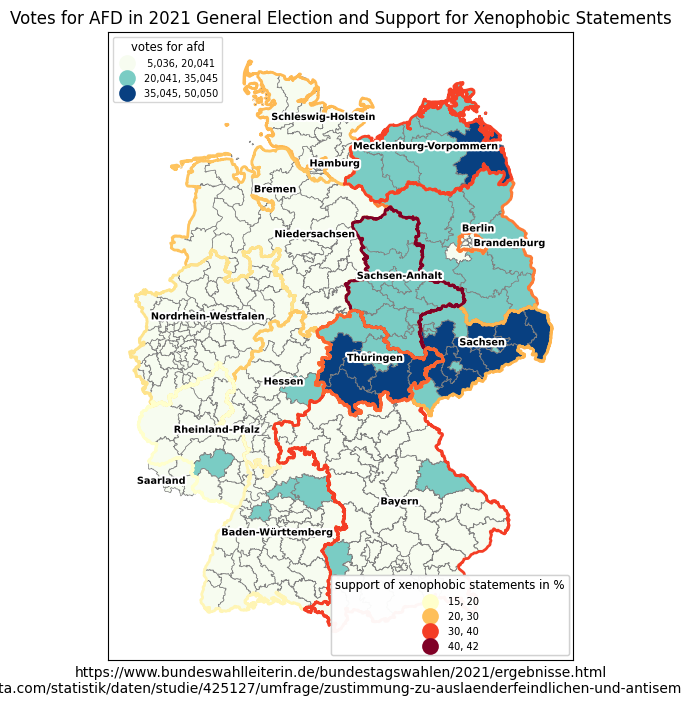

In [ ]:
#code for two legends from the AOK's map.ipynb

if gdf.crs != ger_xen_final.crs:
    gdf = gdf.to_crs(ger_xen_final.crs)


fig, ax = plt.subplots(1, figsize=(6,10))
gdf.plot(ax=ax,column='Alternative für Deutschland (zweitstimmen) ',legend=True,cmap='GnBu',
                   scheme='equalinterval', k=3, edgecolor='grey',linewidth=0.5,
                   legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
l1 = ax.get_legend()
l1.set_title('''votes for afd''')
ax.title.set_text("Votes for AFD in 2021 General Elections and Support of Xenophobic Statements")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html\nhttps://de.statista.com/statistik/daten/studie/425127/umfrage/zustimmung-zu-auslaenderfeindlichen-und-antisemitischen-thesen/''')

#code fore edgecolors from Gemini AI

import matplotlib.colors as mcolors


norm = mcolors.Normalize(vmin=ger_xen_final['Ausländerfeindlichkeit (in prozent)'].min(),
                         vmax=ger_xen_final['Ausländerfeindlichkeit (in prozent)'].max())


edgecolors = plt.cm.YlOrRd(norm(ger_xen_final['Ausländerfeindlichkeit (in prozent)'].values))

ger_xen_final.plot(ax=ax, column='Ausländerfeindlichkeit (in prozent)', legend=True, cmap='YlOrRd',
          scheme="user_defined", classification_kwds={'bins':[20, 30, 40]}, k=4, edgecolor=edgecolors, linewidth=2, facecolor="none",
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.2, 'title_fontsize': 'small', 'fontsize': '7'}, missing_kwds={'color': 'translucent','edgecolor': 'grey'})

l2 = ax.get_legend()
l2.set_title('''support of xenophobic statements in %''')

ax.title.set_text("Votes for AFD in 2021 General Election and Support for Xenophobic Statements")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
!pip install adjustText
from adjustText import adjust_text
from matplotlib.patheffects import withStroke
centroids = ger1.geometry.centroid
texts = []
for idx, row in ger1.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    if row['Bundesländer'] == 'Brandenburg':
        y_offset = -0.1
    else:
        y_offset = 0


    text = ax.text(x, y + y_offset, row['Bundesländer'], ha='center', fontsize=7, color='black', fontweight='bold', path_effects=[withStroke(linewidth=3, foreground='white')])
    texts.append(text)
adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'})

ax.add_artist(l2)
ax.add_artist(l1)

###Economic status

In [ ]:
#get data for social support payments from https://www.regionalstatistik.de/genesis/online?operation=statistic&levelindex=0&levelid=1730557586964&code=22121#abreadcrumb
ger_sl=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/sozialleistungen.xlsx')

In [ ]:
ger_sl.head(5)

county_code                                   Landkreis  \
0          DG                                 Deutschland   
1          01                          Schleswig-Holstein   
2       01001                 Flensburg, kreisfreie Stadt   
3       01002                      Kiel, kreisfreie Stadt   
4       01003        Lübeck, kreisfreie Stadt, Hansestadt   

  Empfänger von Hilfe zum Lebensunterhalt weiblich Ausländer/-innen  \
0                                  224495   111340            49935   
1                                    9340     4660             1380   
2                                     455      220               70   
3                                     865      440              175   
4                                     890      465              110   

  außerhalb von Einrichtungen  \
0                      126225   
1                        5540   
2                         325   
3                         670   
4                         550   

  ausländische Empfänger außerhalb von Einrichtungen unter 7 Jahre  \
0                                              42270          6850   
1                                               1250           340   
2                                                 70            20   
3                                                170            40   
4                                                100            45   

  7 bis unter 18 Jahre 18 bis unter 25 Jahre 25 bis unter 50 Jahre  \
0                17405                  6805                 46015   
1                  665                   450                  2325   
2                   30                    10                   135   
3                   85                    35                   285   
4                   60                    35                   220   

  50 bis unter 65 Jahre 65 Jahre und mehr  
0                 74035             73385  
1                  2755              2805  
2                   130               130  
3                   255               165  
4                   235               295

In [ ]:
ger_sl1=ger_sl[['county_code', 'Landkreis', 'Empfänger von Hilfe zum Lebensunterhalt']]

In [ ]:
ger_sl_map = pd.merge(ger0, ger_sl1, on='county_code',how='outer',indicator=True)
ger_sl_map[['Landkreis','county_code','_merge', 'Empfänger von Hilfe zum Lebensunterhalt']]

ger_sl_final = pd.merge(ger0, ger_sl1, on='county_code',how='inner',indicator=False)

Landkreis  \
0                                  NaN   
1                                  NaN   
2                   Schleswig-Holstein   
3                                  NaN   
4          Flensburg, kreisfreie Stadt   
..                                 ...   
565                                NaN   
566                                NaN   
567                                NaN   
568                                NaN   
569                                NaN   

                                           county_code      _merge  \
0    (2005 - 2009): Empfänger nach dem Sitz des Trä...  right_only   
1    - Namensnennung - Version 2.0. | Stand: 01.11....  right_only   
2                                                   01  right_only   
3    01.01.1979; ab Berichtsjahr 2011 Gebietsstand ...  right_only   
4                                                01001        both   
..                                                 ...         ...   
565  technischen Problemen infolge eines Cyberangri...  right_only   
566  werden alle Werte einer Tabelle mit Empfängerz...  right_only   
567                            zu "Tabelle insgesamt":  right_only   
568  © Statistische Ämter des Bundes und der Länder...  right_only   
569                                                NaN  right_only   

    Empfänger von Hilfe zum Lebensunterhalt  
0                                       NaN  
1                                       NaN  
2                                      9340  
3                                       NaN  
4                                       455  
..                                      ...  
565                                     NaN  
566                                     NaN  
567                                     NaN  
568                                     NaN  
569                                     NaN  

[570 rows x 4 columns]

In [ ]:
ger_sl_final['Empfänger von Hilfe zum Lebensunterhalt']=pd.to_numeric(ger_sl_final['Empfänger von Hilfe zum Lebensunterhalt'], errors='coerce')

<Axes: >

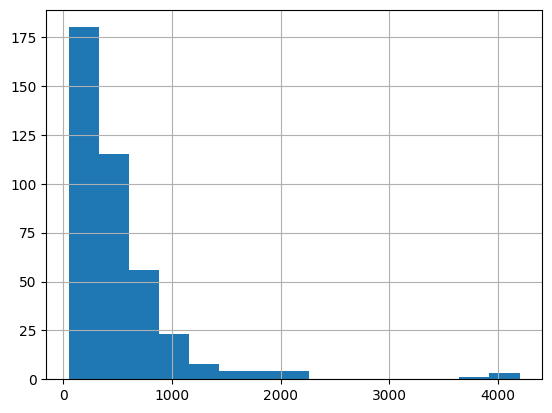

In [ ]:
ger_sl_final['Empfänger von Hilfe zum Lebensunterhalt'].hist(bins=15)

<Axes: >

[]

[]

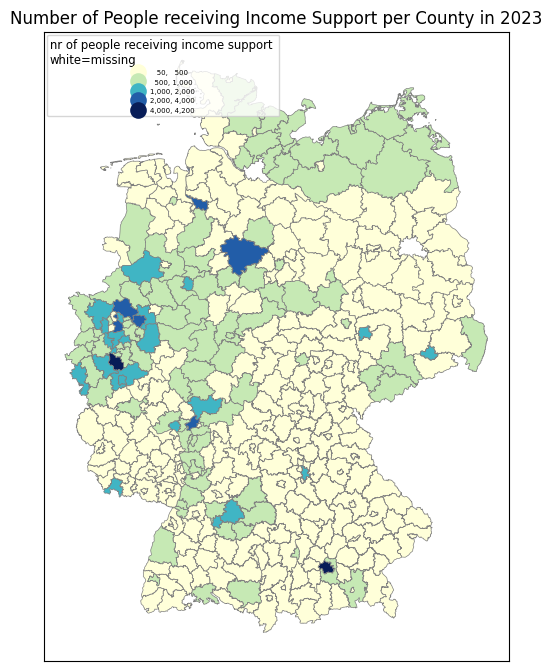

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
ger_sl_final.plot(ax=ax,column='Empfänger von Hilfe zum Lebensunterhalt',legend=True,cmap='YlGnBu',
          scheme="user_defined", classification_kwds={'bins':[500, 1000, 2000, 4000]}, k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'5'})
leg1 = ax.get_legend()
leg1.set_title('''nr of people receiving income support \nwhite=missing''')

ax.title.set_text("Number of People receiving Income Support per County in 2023")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

In [ ]:
#importing data on average income from https://de.statista.com/statistik/daten/studie/209211/umfrage/loehne-und-gehaelter-in-deutschland-nach-bundeslaendern-und-geschlecht-2010/
ger_inc=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/einkommen.xlsx')

In [ ]:
ger_inc.head(5)

Bundesländer  Männer  Frauen  Insgesamt Unnamed: 4
0            Hamburg  5588.0  4471.0     5209.0       in €
1             Hessen  5261.0  4450.0     5016.0       in €
2  Baden-Württemberg  5137.0  4039.0     4815.0       in €
3             Bayern  5068.0  4153.0     4804.0       in €
4             Berlin  4926.0  4257.0     4662.0       in €

In [ ]:
#merging average monthly income data with the state shapefile
ger_inc_map = pd.merge(ger1, ger_inc, on='Bundesländer',how='outer',indicator=True)
ger_inc_map[['Bundesländer','_merge', 'Insgesamt']]

ger_inc__final = pd.merge(ger1, ger_inc, on='Bundesländer',how='inner', indicator=False)

Bundesländer      _merge  Insgesamt
0                                   Baden-Württemberg        both     4815.0
1                                              Bayern        both     4804.0
2                                              Berlin        both     4662.0
3                                         Brandenburg        both     3684.0
4                                              Bremen        both     4538.0
5   Bruttomonatsverdienst nach Bundesländern und G...  right_only        NaN
6                                         Deutschland  right_only     4514.0
7   Durchschnittlicher Bruttomonatsverdienst von v...  right_only        NaN
8                                             Hamburg        both     5209.0
9                                              Hessen        both     5016.0
10                             Mecklenburg-Vorpommern        both     3476.0
11                                      Niedersachsen        both     4234.0
12                                Nordrhein-Westfalen        both     4547.0
13                                    Rheinland-Pfalz        both     4328.0
14                                           Saarland        both     4092.0
15                                            Sachsen        both     3711.0
16                                     Sachsen-Anhalt        both     3641.0
17                                 Schleswig-Holstein        both     4084.0
18                                          Thüringen        both     3542.0
19                                                NaN  right_only        NaN

<Axes: >

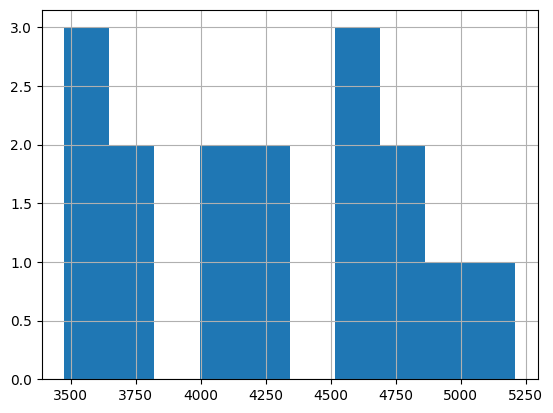

In [ ]:
ger_inc__final['Insgesamt'].hist(bins=10)

<Axes: >

[]

[]

([Text(574857.5862010963, 6016285.984100916, 'Schleswig-Holstein'),
  Text(591582.2163353614, 5945775.987659408, 'Hamburg'),
  Text(561483.6493123663, 5838483.530761331, 'Niedersachsen'),
  Text(501110.0880414926, 5906559.701282016, 'Bremen'),
  Text(399578.37176985503, 5713815.200032481, 'Nordrhein-Westfalen'),
  Text(513975.5607037855, 5615118.269553685, 'Hessen'),
  Text(413109.11408018926, 5542031.2378407465, 'Rheinland-Pfalz'),
  Text(504589.1984999303, 5386361.503529338, 'Baden-Württemberg'),
  Text(689950.8819040508, 5433303.290861244, 'Bayern'),
  Text(328723.21685442136, 5464611.6492109345, 'Saarland'),
  Text(809265.4773168579, 5847159.636287477, 'Berlin'),
  Text(856802.4192650862, 5824998.43552734, 'Brandenburg'),
  Text(729830.0251532064, 5971837.390960593, 'Mecklenburg-Vorpommern'),
  Text(815129.0908504288, 5674568.151513794, 'Sachsen'),
  Text(690046.8123321543, 5775347.848861445, 'Sachsen-Anhalt'),
  Text(653117.8194793192, 5650894.955123185, 'Thüringen')],
 [])

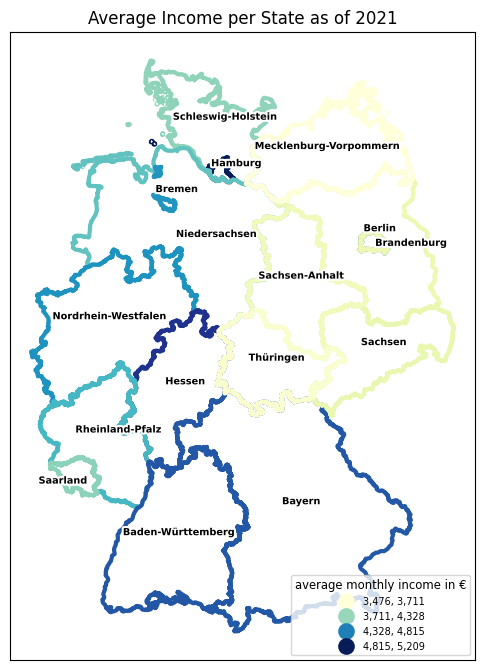

In [ ]:
#code fore edgecolors from Gemini AI
import matplotlib.colors as mcolors
fig, ax = plt.subplots(1, figsize=(6, 10))


norm = mcolors.Normalize(vmin=ger_inc__final['Insgesamt'].min(),
                         vmax=ger_inc__final['Insgesamt'].max())


edgecolors = plt.cm.YlGnBu(norm(ger_inc__final['Insgesamt'].values))

ger_inc__final.plot(ax=ax, column='Insgesamt', legend=True, cmap='YlGnBu',
          scheme="naturalbreaks", k=4, edgecolor=edgecolors, linewidth=3, facecolor="none",
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.2, 'title_fontsize': 'small', 'fontsize': '7'})
leg1 = ax.get_legend()
leg1.set_title('''average monthly income in €''')

ax.title.set_text("Average Income per State as of 2021")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
from matplotlib.patheffects import withStroke
centroids = ger1.geometry.centroid
texts = []
for idx, row in ger1.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    if row['Bundesländer'] == 'Brandenburg':
        y_offset = -0.1
    else:
        y_offset = 0


    text = ax.text(x, y + y_offset, row['Bundesländer'], ha='center', fontsize=7, color='black', fontweight='bold', path_effects=[withStroke(linewidth=3, foreground='white')])
    texts.append(text)
adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'})

<Axes: >

<Axes: title={'center': 'People Receiving Income Support and Average Monthly Income'}>

[]

[]

([Text(574857.5862010963, 6016285.984100917, 'Schleswig-Holstein'),
  Text(591582.2163353614, 5945775.987659409, 'Hamburg'),
  Text(561483.6493123663, 5838483.530761331, 'Niedersachsen'),
  Text(501110.0880414926, 5906559.701282017, 'Bremen'),
  Text(399578.37176985503, 5713815.200032481, 'Nordrhein-Westfalen'),
  Text(513975.5607037855, 5615118.269553686, 'Hessen'),
  Text(413109.11408018926, 5542031.2378407465, 'Rheinland-Pfalz'),
  Text(504589.1984999303, 5386361.503529339, 'Baden-Württemberg'),
  Text(689950.8819040508, 5433303.290861244, 'Bayern'),
  Text(328723.21685442136, 5464611.649210935, 'Saarland'),
  Text(809265.4773168579, 5847159.636287477, 'Berlin'),
  Text(856802.4192650862, 5824998.4355273405, 'Brandenburg'),
  Text(729830.0251532064, 5971837.390960594, 'Mecklenburg-Vorpommern'),
  Text(815129.0908504288, 5674568.151513795, 'Sachsen'),
  Text(690046.8123321543, 5775347.848861445, 'Sachsen-Anhalt'),
  Text(653117.8194793192, 5650894.955123185, 'Thüringen')],
 [])

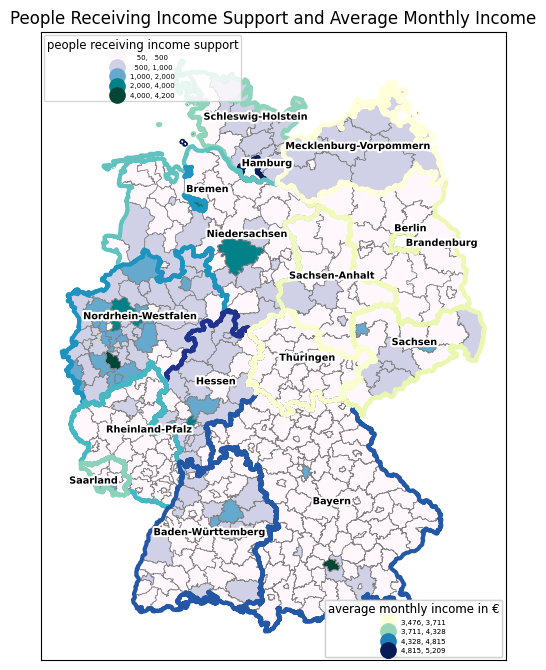

In [ ]:
#code for two legends from the AOK's map.ipynb

if ger_sl_final.crs != ger_inc__final.crs:
    gdf_econ = ger_sl_final.to_crs(ger_inc__final.crs)


fig, ax = plt.subplots(1, figsize=(6,10))
gdf_econ.plot(ax=ax,column='Empfänger von Hilfe zum Lebensunterhalt',legend=True,cmap='PuBuGn',
          scheme="user_defined", classification_kwds={'bins':[500, 1000, 2000, 4000]}, k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'5'})
l1 = ax.get_legend()
l1.set_title('''people receiving income support''')
ax.title.set_text("People Receiving Income Support and Average Monthly Income")
#ax.set_xticks([]) #kills xticks
#ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html\nhttps://de.statista.com/statistik/daten/studie/425127/umfrage/zustimmung-zu-auslaenderfeindlichen-und-antisemitischen-thesen/''')

#code fore edgecolors from Gemini AI

import matplotlib.colors as mcolors


norm = mcolors.Normalize(vmin=ger_inc__final['Insgesamt'].min(),
                         vmax=ger_inc__final['Insgesamt'].max())


edgecolors = plt.cm.YlGnBu(norm(ger_inc__final['Insgesamt'].values))

ger_inc__final.plot(ax=ax, column='Insgesamt', legend=True, cmap='YlGnBu',
          scheme="naturalbreaks", k=4, edgecolor=edgecolors, linewidth=3, facecolor="none",
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.2, 'title_fontsize': 'small', 'fontsize': '5'})

l2 = ax.get_legend()
l2.set_title('''average monthly income in €''')

ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
!pip install adjustText
from adjustText import adjust_text
from matplotlib.patheffects import withStroke
centroids = ger1.geometry.centroid
texts = []
for idx, row in ger1.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    if row['Bundesländer'] == 'Brandenburg':
        y_offset = -0.1
    else:
        y_offset = 0


    text = ax.text(x, y + y_offset, row['Bundesländer'], ha='center', fontsize=7, color='black', fontweight='bold', path_effects=[withStroke(linewidth=3, foreground='white')])
    texts.append(text)
adjust_text(texts, ax=ax, only_move={'points': 'y', 'text': 'y'})

ax.add_artist(l2)
ax.add_artist(l1)

###Side by Side

<Axes: >

[]

[]

<Axes: title={'center': 'Change Foreign Born + Asylum Seekers 2013-2023'}>

([Text(637443.5940457812, 6019749.691544493, 'Schleswig-Holstein'),
  Text(619949.966326055, 5945341.452356886, 'Hamburg'),
  Text(595262.6562476105, 5838267.834982144, 'Niedersachsen'),
  Text(457577.61488062725, 5884684.830875953, 'Bremen'),
  Text(493136.19767621614, 5716629.462330386, 'Nordrhein-Westfalen'),
  Text(542777.8459970012, 5607212.364299819, 'Hessen'),
  Text(455120.7136822272, 5545494.945284322, 'Rheinland-Pfalz'),
  Text(594681.74509064, 5389175.765827244, 'Baden-Württemberg'),
  Text(697312.8320937253, 5436117.553159149, 'Bayern'),
  Text(320279.6440246665, 5462446.832058699, 'Saarland'),
  Text(812378.6899034581, 5853221.1243137345, 'Berlin'),
  Text(873213.795335338, 5824226.904203087, 'Brandenburg'),
  Text(811296.216744042, 5976600.774631547, 'Mecklenburg-Vorpommern'),
  Text(829854.5631018532, 5677382.4138116995, 'Sachsen'),
  Text(749819.3438149709, 5781085.793218924, 'Sachsen-Anhalt'),
  Text(584031.0726896281, 5631294.3216310255, 'Thüringen')],
 [])

<Axes: >

[]

[]

Text(0.5, 175.42900967780815, 'https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html\nhttps://de.statista.com/statistik/daten/studie/425127/umfrage/zustimmung-zu-auslaenderfeindlichen-und-antisemitischen-thesen/')

<Axes: title={'center': 'Support for AFD + Xenophobic Statements'}>

([Text(607122.2899763634, 6019439.839123441, 'Schleswig-Holstein'),
  Text(618904.2144050061, 5945109.0630410975, 'Hamburg'),
  Text(585955.6402027878, 5836512.371372253, 'Niedersachsen'),
  Text(458081.125064836, 5884878.488639111, 'Bremen'),
  Text(422503.049614868, 5716377.707238282, 'Nordrhein-Westfalen'),
  Text(541964.4833917412, 5597416.191641629, 'Hessen'),
  Text(438520.7223294164, 5545185.092863271, 'Rheinland-Pfalz'),
  Text(527908.1082227592, 5388924.010735139, 'Baden-Württemberg'),
  Text(696925.516567411, 5435865.798067045, 'Bayern'),
  Text(320899.3488667697, 5462640.489821856, 'Saarland'),
  Text(812107.5690350385, 5852678.882576895, 'Berlin'),
  Text(871741.9963353436, 5824188.1726504555, 'Brandenburg'),
  Text(767249.3578059307, 5976310.287986811, 'Mecklenburg-Vorpommern'),
  Text(829351.0529176447, 5677130.6587195955, 'Sachsen'),
  Text(735168.4738352093, 5780775.940797872, 'Sachsen-Anhalt'),
  Text(604296.9174727489, 5631487.979394182, 'Thüringen')],
 [])

<Axes: >

[]

[]

<Axes: title={'center': 'Income Support + Average Monthly Income'}>

([Text(609290.3310554556, 6018999.108840309, 'Schleswig-Holstein'),
  Text(617416.7496994375, 5944778.515328748, 'Hamburg'),
  Text(585662.3786075478, 5836787.827799208, 'Niedersachsen'),
  Text(458797.31177492463, 5885153.945066067, 'Bremen'),
  Text(425552.5512602234, 5716019.613883237, 'Nordrhein-Westfalen'),
  Text(540807.566398521, 5611756.787799362, 'Hessen'),
  Text(440798.9459792916, 5544744.362580139, 'Rheinland-Pfalz'),
  Text(530902.5185827229, 5388565.9173800945, 'Baden-Württemberg'),
  Text(696374.6037134966, 5435507.704712001, 'Bayern'),
  Text(321780.8094330325, 5462915.9462488135, 'Saarland'),
  Text(811721.930037298, 5851907.604581414, 'Berlin'),
  Text(869648.5274904687, 5824133.081365064, 'Brandenburg'),
  Text(769968.3117389369, 5975897.103346376, 'Mecklenburg-Vorpommern'),
  Text(828634.8662075559, 5676772.565364551, 'Sachsen'),
  Text(737446.6974850846, 5780335.210514741, 'Sachsen-Anhalt'),
  Text(588701.0563653407, 5635474.032891192, 'Thüringen')],
 [])

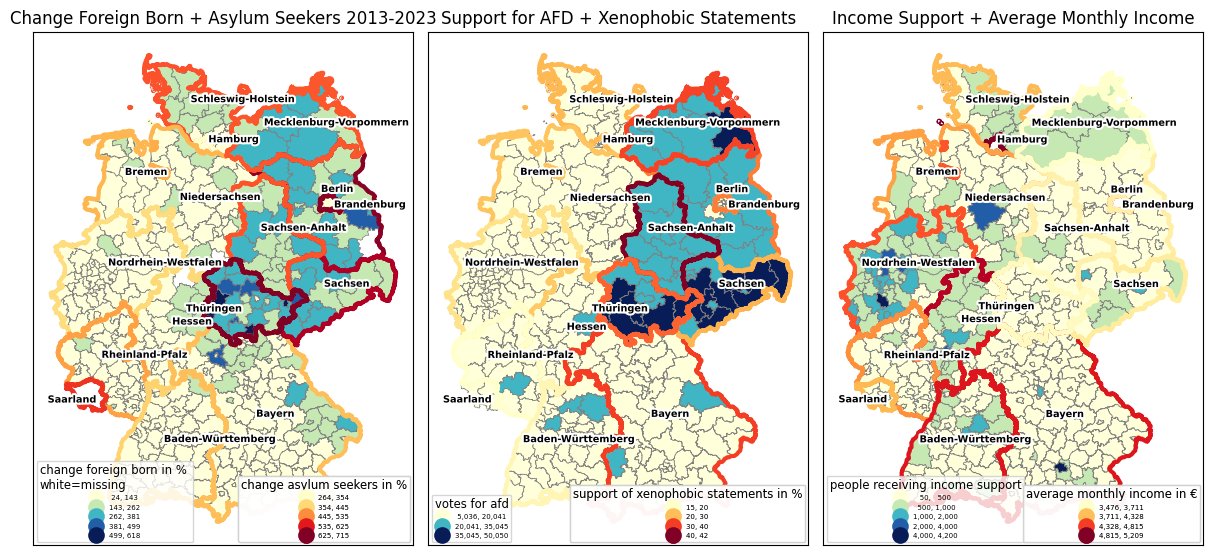

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12,20),sharey=True, tight_layout=True)


gerfb_change_final = gerfb_change_final.set_geometry('geometry')

if gerfb_change_final.crs != geras_change_final.crs:
    gerfb_change_final = gerfb_change_final.to_crs(geras_change_final.crs)


gerfb_change_final.plot(ax=axs[0],column='fb_change',legend=True,cmap='YlGnBu',
          scheme="equal_interval", k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'5', 'title': 'change in % \nwhite=missing'})
l1 = axs[0].get_legend()
l1.set_title('''change foreign born in % \nwhite=missing''')

axs[0].title.set_text("Change Foreign Born + Asylum Seekers 2013-2023")
axs[0].set_xticks([]) #kills xticks
axs[0].set_yticks([]) #kills xticks
#code for this adjustment from Gemini AI
fig.subplots_adjust(right=0.8)

#code fore edgecolors from Gemini AI

import matplotlib.colors as mcolors


norm = mcolors.Normalize(vmin=geras_change_final['as_change'].min(),
                         vmax=geras_change_final['as_change'].max())


edgecolors = plt.cm.YlOrRd(norm(geras_change_final['as_change'].values))

geras_change_final.plot(ax=axs[0], column='as_change', legend=True, cmap='YlOrRd',
          scheme="equal_interval", k=5, edgecolor=edgecolors, linewidth=3, facecolor="none",
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.2, 'title_fontsize': 'small', 'fontsize': '5', 'title': 'change asylum seekers in % \nwhite=missing'})

l2 = axs[0].get_legend()
l2.set_title('''change asylum seekers in %''')

from matplotlib.patheffects import withStroke
centroids = ger1.geometry.centroid
texts = []
for idx, row in ger1.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    if row['Bundesländer'] == 'Brandenburg':
        y_offset = -0.1
    else:
        y_offset = 0


    text = axs[0].text(x, y + y_offset, row['Bundesländer'], ha='center', fontsize=7, color='black', fontweight='bold', path_effects=[withStroke(linewidth=3, foreground='white')])
    texts.append(text)
adjust_text(texts, ax=axs[0], only_move={'points': 'y', 'text': 'y'})

axs[0].add_artist(l2)
axs[0].add_artist(l1)

if gdf.crs != ger_xen_final.crs:
    gdf = gdf.to_crs(ger_xen_final.crs)

gdf.plot(ax=axs[1],column='Alternative für Deutschland (zweitstimmen) ',legend=True,cmap='YlGnBu',
                   scheme='equalinterval', k=3, edgecolor='grey',linewidth=0.5,
                   legend_kwds= {"fmt": "{:,.0f}",'loc':'lower left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'5'})
l1 = axs[1].get_legend()
l1.set_title('''votes for afd''')
axs[1].title.set_text("Support for AFD + Xenophobic Statements")
axs[1].set_xticks([]) #kills xticks
axs[1].set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html\nhttps://de.statista.com/statistik/daten/studie/425127/umfrage/zustimmung-zu-auslaenderfeindlichen-und-antisemitischen-thesen/''')
#code for this adjustment from Gemini AI

#code fore edgecolors from Gemini AI

import matplotlib.colors as mcolors


norm = mcolors.Normalize(vmin=ger_xen_final['Ausländerfeindlichkeit (in prozent)'].min(),
                         vmax=ger_xen_final['Ausländerfeindlichkeit (in prozent)'].max())


edgecolors = plt.cm.YlOrRd(norm(ger_xen_final['Ausländerfeindlichkeit (in prozent)'].values))

ger_xen_final.plot(ax=axs[1], column='Ausländerfeindlichkeit (in prozent)', legend=True, cmap='YlOrRd',
          scheme="user_defined", classification_kwds={'bins':[20, 30, 40]}, k=4, edgecolor=edgecolors, linewidth=3, facecolor="none",
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.2, 'title_fontsize': 'small', 'fontsize': '5'}, missing_kwds={'color': 'translucent','edgecolor': 'grey'})

l2 = axs[1].get_legend()
l2.set_title('''support of xenophobic statements in %''')

centroids = ger1.geometry.centroid
texts = []
for idx, row in ger1.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    if row['Bundesländer'] == 'Brandenburg':
        y_offset = -0.1
    else:
        y_offset = 0


    text = axs[1].text(x, y + y_offset, row['Bundesländer'], ha='center', fontsize=7, color='black', fontweight='bold', path_effects=[withStroke(linewidth=3, foreground='white')])
    texts.append(text)
adjust_text(texts, ax=axs[1], only_move={'points': 'y', 'text': 'y'})

axs[1].add_artist(l2)
axs[1].add_artist(l1)


if ger_sl_final.crs != ger_inc__final.crs:
    gdf_econ = ger_sl_final.to_crs(ger_inc__final.crs)

gdf_econ.plot(ax=axs[2],column='Empfänger von Hilfe zum Lebensunterhalt',legend=True,cmap='YlGnBu',
          scheme="user_defined", classification_kwds={'bins':[500, 1000, 2000, 4000]}, k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'5'})
l1 = axs[2].get_legend()
l1.set_title('''people receiving income support''')
axs[2].title.set_text("Income Support + Average Monthly Income")
axs[2].set_xticks([]) #kills xticks
axs[2].set_yticks([]) #kills xticks
#ax.set_xlabel('''https://www.bundeswahlleiterin.de/bundestagswahlen/2021/ergebnisse.html\nhttps://de.statista.com/statistik/daten/studie/425127/umfrage/zustimmung-zu-auslaenderfeindlichen-und-antisemitischen-thesen/''')

#code fore edgecolors from Gemini AI

import matplotlib.colors as mcolors


norm = mcolors.Normalize(vmin=ger_inc__final['Insgesamt'].min(),
                         vmax=ger_inc__final['Insgesamt'].max())


edgecolors = plt.cm.YlOrRd(norm(ger_inc__final['Insgesamt'].values))

ger_inc__final.plot(ax=axs[2], column='Insgesamt', legend=True, cmap='YlOrRd',
          scheme="naturalbreaks", k=4, edgecolor=edgecolors, linewidth=3, facecolor="none",
          legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.2, 'title_fontsize': 'small', 'fontsize': '5'})

l2 = axs[2].get_legend()
l2.set_title('''average monthly income in €''')

centroids = ger1.geometry.centroid
texts = []
for idx, row in ger1.iterrows():
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    if row['Bundesländer'] == 'Brandenburg':
        y_offset = -0.1
    else:
        y_offset = 0


    text = axs[2].text(x, y + y_offset, row['Bundesländer'], ha='center', fontsize=7, color='black', fontweight='bold', path_effects=[withStroke(linewidth=3, foreground='white')])
    texts.append(text)
adjust_text(texts, ax=axs[2], only_move={'points': 'y', 'text': 'y'})

axs[2].add_artist(l2)
axs[2].add_artist(l1)


###Interpretation of the Maps

The maps above show, that the areas with the highest rate of change from 2013 to 2023 in terms of foreign born people living in Germany, as well as specifically aslyum seekers living in Germany is in the north eastern part of Germany, which was East Germany before the unification in 1989.

These same areas are also the areas with the highest support for the far right political party AFD. To further understand people's position on immigration, I also mapped the responses to a 2015 survey which asked people's opinion on xenophobic statements. The results of this survey show that support for the AFD generally overlaps with support of xenophobic statements, concentrating in the north eastern areas as well. However, Bavaria (Bayern) is an exception with a high rate of support for xenophobic statements despite relatively low support for the AFD. This could maybe be explained by the fact that Bavaria has several other strong political parties with severe anti-immigrant stances.

The correlation between support for anti-immigrant stances and high rates of change in both foreign born and asylum seeker population suggests that anti-immigrant stances might be furthered by high rates of change, although no causation is proven by this.

To analyse an additional factor that might contribute to an explanation, I also mapped two factors of the economic situation: the average income per state and the amount of people who received income support payment per county. The amount of people who received income support payment is generally very low, and quite evenly distributed. However, there is some disparaty in terms of average income, which is higher in the parts of Germany that also have lower support for the AFD. This suggets a correlation between support for the AFD and lower income. This might also contribute to stronger anti-immigrant stances.

To further explore these topics, I could map the concentration of crimes motivated by xenophobia, as well as further factors indicating economic situations, such as the median household income, which might be a better indicator, or rates of unemployment.

#Origin Countries

###Mapping Origin Countries

In [5]:
#shapefile from https://datacatalog.worldbank.org/search/dataset/0038272/World-Bank-Official-Boundaries
! wget -q -O worldmap.zip https://raw.githubusercontent.com/hbeck118/GIS/main/wb_countries_admin0_10m.zip
zip_ref = zipfile.ZipFile('worldmap.zip', 'r'); zip_ref.extractall(); zip_ref.close()
world=gpd.read_file('WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp')


<Axes: >

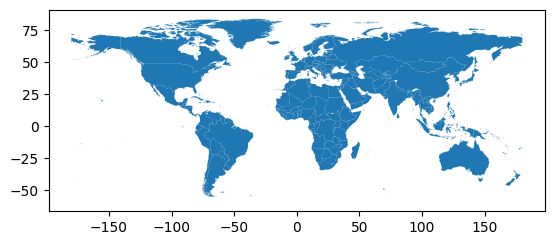

In [ ]:
world.plot()

In [ ]:
world.columns

Index(['OBJECTID', 'featurecla', 'LEVEL', 'TYPE', 'FORMAL_EN', 'FORMAL_FR',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2', 'ISO_A3',
       'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_AR', 'NAME_BN', 'NAME_DE',
       'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU',
       'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL',
       'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH',
       'WB_NAME', 'WB_RULES', 'WB_REGION', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')

In [ ]:
world['NAME_EN']

0                                 Indonesia
1                                  Malaysia
2                                     Chile
3                                   Bolivia
4                                      Peru
                       ...                 
246    United States Minor Outlying Islands
247    United States Minor Outlying Islands
248    United States Minor Outlying Islands
249                             New Zealand
250                             New Zealand
Name: NAME_EN, Length: 251, dtype: object

In [6]:
#import data about countries of origin of forgeign born population in Germany from https://www.statista.com/statistics/890277/foreigner-numbers-by-country-of-origin-germany/
oc=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/countries_of_origin_germany.xlsx')

In [ ]:
oc.head(5)

Number of foreigners in Germany 2023, by country of origin  total number
0                                             Turkey               1548095
1                                            Ukraine               1239705
2                                              Syria                972460
3                                            Romania                909795
4                                             Poland                887715

In [7]:
#reducing list to only origin countries where more than 60000 migrants are from to get an idea of the most important origin countires
top_oc=oc[oc['total number'] > 60000]

In [ ]:
top_oc

Number of foreigners in Germany 2023, by country of origin  total number
0                                              Turkey               1548095
1                                             Ukraine               1239705
2                                               Syria                972460
3                                             Romania                909795
4                                              Poland                887715
5                                               Italy                644035
6                                            Bulgaria                436860
7                                             Croatia                434045
8                                         Afghanistan                419410
9                                              Greece                359045
10                                             Russia                308015
11                                             Kosovo                299685
12                                               Iraq                281340
13                                             Serbia                259985
14                                              India                246125
15                             Bosnia and Herzegovina                245270
16                                            Hungary                220345
17                                              Spain                199005
18                                            Austria                184330
19                                    North Macedonia                156845
20                                              China                155955
21                                               Iran                155215
22                                        Netherlands                149770
23                                             France                140400
24                                           Portugal                140275
25                                            Vietnam                127825
26                                                USA                122475
27                                            Albania                119795
28                                            Morocco                 99110
29                            Unclarified/Unspecified                 96260
30                                           Pakistan                 91425
31                                            Eritrea                 84010
32                                     United Kingdom                 83885
33                                            Nigeria                 83765
34                                            Czechia                 65665
35                                           Slovakia                 64745
36                                            Somalia                 60295
37                                           Thailand                 60020

In [8]:
oc1 = top_oc.rename(columns={'Number of foreigners in Germany 2023, by country of origin': 'NAME_EN'})

In [9]:
merged_oc = pd.merge(world, oc1, on='NAME_EN', how='outer', indicator=True)
merged_oc[['NAME_EN' ,'total number','_merge']]

NAME_EN  total number     _merge
0          Afghanistan      419410.0       both
1              Albania      119795.0       both
2              Algeria           NaN  left_only
3       American Samoa           NaN  left_only
4              Andorra           NaN  left_only
..                 ...           ...        ...
251  Wallis and Futuna           NaN  left_only
252              Yemen           NaN  left_only
253             Zambia           NaN  left_only
254           Zimbabwe           NaN  left_only
255           eSwatini           NaN  left_only

[256 rows x 3 columns]

In [10]:
#figuring out which counties are in origin countries df but didn't merge with world df
merged_oc_dif = merged_oc[merged_oc['_merge'] == 'right_only']
merged_oc_dif[['NAME_EN', 'total number', '_merge']]


NAME_EN  total number      _merge
43                     China      155955.0  right_only
54                   Czechia       65665.0  right_only
160          North Macedonia      156845.0  right_only
228                      USA      122475.0  right_only
231  Unclarified/Unspecified       96260.0  right_only

In [11]:
#figuring out what these countries are called in the world shapefile
#code adapted from chat GPT
list(filter(lambda x: 'China' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Czech' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'America' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Macedonia' in x,world['NAME_EN'].to_list()))

["People's Republic of China"]

['Czech Republic']

['United States of America', 'American Samoa']

['Republic of Macedonia']

In [12]:
#replacing the names in the oc dataset with the ones used in world
oc1['NAME_EN'] = oc1['NAME_EN'].replace('China', 'People\'s Republic of China')
oc1['NAME_EN'] = oc1['NAME_EN'].replace('Czechia', 'Czech Republic')
oc1['NAME_EN'] = oc1['NAME_EN'].replace('United States', 'United States of America')
oc1['NAME_EN'] = oc1['NAME_EN'].replace('Macedonia', 'Republic of Macedonia')

In [13]:
#merge again
merged_oc1 = pd.merge(world, oc1, on='NAME_EN', how='outer', indicator=True)
merged_oc1[['NAME_EN' ,'total number','_merge']]
merged_oc_final = pd.merge(world, oc1, on='NAME_EN', how='inner', indicator=False)

NAME_EN  total number     _merge
0          Afghanistan      419410.0       both
1              Albania      119795.0       both
2              Algeria           NaN  left_only
3       American Samoa           NaN  left_only
4              Andorra           NaN  left_only
..                 ...           ...        ...
249  Wallis and Futuna           NaN  left_only
250              Yemen           NaN  left_only
251             Zambia           NaN  left_only
252           Zimbabwe           NaN  left_only
253           eSwatini           NaN  left_only

[254 rows x 3 columns]

In [14]:
#making sure all 38 top countries merged
merged_oc1_check = merged_oc1[merged_oc1['_merge'] == 'both']
merged_oc1_check[['NAME_EN', 'total number', '_merge']]

NAME_EN  total number _merge
0                   Afghanistan      419410.0   both
1                       Albania      119795.0   both
14                      Austria      184330.0   both
26       Bosnia and Herzegovina      245270.0   both
32                     Bulgaria      436860.0   both
48                      Croatia      434045.0   both
52               Czech Republic       65665.0   both
63                      Eritrea       84010.0   both
71                       France      140400.0   both
79                       Greece      359045.0   both
93                      Hungary      220345.0   both
95                        India      246125.0   both
97                         Iran      155215.0   both
98                         Iraq      281340.0   both
102                       Italy      644035.0   both
111                      Kosovo      299685.0   both
139                     Morocco       99110.0   both
145                 Netherlands      149770.0   both
146                 Netherlands      149770.0   both
147                 Netherlands      149770.0   both
148                 Netherlands      149770.0   both
154                     Nigeria       83765.0   both
162                    Pakistan       91425.0   both
168  People's Republic of China      155955.0   both
172                      Poland      887715.0   both
173                    Portugal      140275.0   both
178                     Romania      909795.0   both
179                      Russia      308015.0   both
192                      Serbia      259985.0   both
197                    Slovakia       64745.0   both
200                     Somalia       60295.0   both
205                       Spain      199005.0   both
211                       Syria      972460.0   both
215                    Thailand       60020.0   both
222                      Turkey     1548095.0   both
228                     Ukraine     1239705.0   both
231              United Kingdom       83885.0   both
248                     Vietnam      127825.0   both

<Axes: >

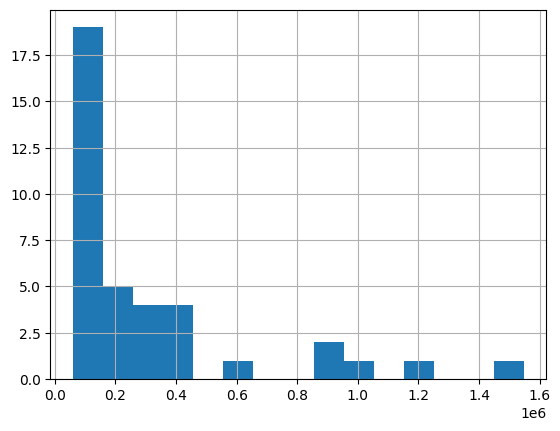

In [ ]:
merged_oc_final['total number'].hist(bins=15)

<Axes: >

[]

[]

Text(0.5, 388.5490205484666, 'https://www.statista.com/statistics/890277/foreigner-numbers-by-country-of-origin-germany/')

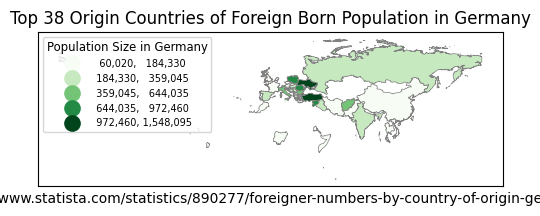

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,10))
merged_oc_final.plot(ax=ax,column='total number',legend=True,cmap='Greens',
          scheme="naturalbreaks", k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
leg1 = ax.get_legend()
leg1.set_title('''Population Size in Germany''')

ax.title.set_text("Top 38 Origin Countries of Foreign Born Population in Germany")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://www.statista.com/statistics/890277/foreigner-numbers-by-country-of-origin-germany/''')

In [15]:
! pip install folium
! pip install geopandas folium
import folium

In [27]:
#code adapted from AOK's folium.ipynb and ChatGPT
import folium

style_function = lambda x: {'fillColor': '#ffffff', #it makes it look cleaner without nasty default blue thick borders
                            'color':'#000000',
                            'fillOpacity': 0.1,
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', #it highlights polygon when hover over
                                'color':'#000000',
                                'fillOpacity': 0.50,
                                'weight': 0.1}

worldmap = folium.Map(location=[20, 30], zoom_start=4)
folium.Choropleth(
    geo_data=merged_oc_final,
    data= merged_oc_final,
    columns=['NAME_EN','total number'],
    key_on= 'feature.properties.NAME_EN',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Living in Germany',
    threshold_scale=[60020, 300000, 500000, 800000, 1000000, 1548095]
).add_to(worldmap)

folium.GeoJson(
    merged_oc_final,
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 0.5, 'opacity': 1},
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME_EN', 'total number'],
        aliases=['Country: ', 'Nr of people living in Germany: '],
        localize=True
    )
).add_to(worldmap)

title_html = ''' <h3 align="center" style="font-size:20px"><b>Top 38 Origin Countires of Foreign Born Population in Living in Germany</b></h3> '''
worldmap.get_root().html.add_child(folium.Element(title_html))

#worldmap



###Remittances Sent from Germany

In [17]:
#importing data on remittances sent from Germany from https://www.statista.com/statistics/1367381/bilateral-remittances-germany/
ger_rem=pd.read_excel('https://raw.githubusercontent.com/hbeck118/GIS/main/remittances_from_germany.xlsx')

In [ ]:
ger_rem.head(5)

Destination of Remittances  \
0                  Worldwide   
1                     Poland   
2                    Czechia   
3                    Croatia   
4                    Romania   

   Remittances sent from Germany (in million U.S. dollars)  
0                                           37363.29        
1                                            3173.71        
2                                            2608.82        
3                                            2057.97        
4                                            1798.88

In [18]:
ger_rem1 = ger_rem.rename(columns={'Destination of Remittances': 'NAME_EN'})

In [19]:
ger_rem_merge = pd.merge(world, ger_rem1, on='NAME_EN', how='outer', indicator=True)
ger_rem_merge[['NAME_EN' ,'Remittances sent from Germany (in million U.S. dollars)','_merge']]

NAME_EN  Remittances sent from Germany (in million U.S. dollars)  \
0       Afghanistan                                              24.39         
1           Albania                                             120.32         
2           Algeria                                              23.44         
3    American Samoa                                                NaN         
4           Andorra                                               0.00         
..              ...                                                ...         
264       Worldwide                                           37363.29         
265           Yemen                                                NaN         
266          Zambia                                               1.82         
267        Zimbabwe                                               7.52         
268        eSwatini                                                NaN         

         _merge  
0          both  
1          both  
2          both  
3     left_only  
4          both  
..          ...  
264  right_only  
265   left_only  
266        both  
267        both  
268   left_only  

[269 rows x 3 columns]

In [20]:
#figuring out which coutnies are in origin countires df but didn't merge with world df
rem_mer_dif = ger_rem_merge[ger_rem_merge['_merge'] == 'right_only']
rem_mer_dif[['NAME_EN', 'Remittances sent from Germany (in million U.S. dollars)', '_merge']]


NAME_EN  \
7           Antigua & Barbuda   
17                    Bahamas   
28       Bosnia & Herzegovina   
46                      China   
57                    Czechia   
70                   Eswatini   
81                     Gambia   
100             Hong Kong SAR   
166           North Macedonia   
173   Palestinian territories   
199       Sao Tome & Principe   
217         St. Kitts & Nevis   
218                 St. Lucia   
219  St. Vincent & Grenadines   
231               Timor-Leste   
234         Trinidad & Tobago   
245             United States   
264                 Worldwide   

     Remittances sent from Germany (in million U.S. dollars)      _merge  
7                                                 0.02        right_only  
17                                                0.00        right_only  
28                                              326.98        right_only  
46                                              751.50        right_only  
57                                             2608.82        right_only  
70                                                0.17        right_only  
81                                               75.64        right_only  
100                                               0.42        right_only  
166                                             127.76        right_only  
173                                               6.10        right_only  
199                                               0.01        right_only  
217                                               0.05        right_only  
218                                               0.10        right_only  
219                                               0.09        right_only  
231                                               0.03        right_only  
234                                               0.66        right_only  
245                                             275.24        right_only  
264                                           37363.29        right_only

In [21]:
#figuring out what these countries are called in the world shapefile
#code adapted from chat GPT
list(filter(lambda x: 'Antigua' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Bahamas' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Bosnia' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'China' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Czech' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'eSwatini' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Gambia' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Hong' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Macedonia' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Palestin' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Tomé' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Kitts' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Lucia' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Vincent' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Timor' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'Trinidad' in x,world['NAME_EN'].to_list()))
list(filter(lambda x: 'America' in x,world['NAME_EN'].to_list()))

['Antigua and Barbuda']

['The Bahamas']

['Bosnia and Herzegovina']

["People's Republic of China"]

['Czech Republic']

['eSwatini']

['The Gambia']

['Hong Kong']

['Republic of Macedonia']

['Palestine']

['São Tomé and Príncipe']

['Saint Kitts and Nevis']

['Saint Lucia']

['Saint Vincent and the Grenadines']

['East Timor']

['Trinidad and Tobago']

['United States of America', 'American Samoa']

In [22]:
#replacing the names in the oc dataset with the ones used in world
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('Antigua & Barbuda', 'Antigua and Barbuda')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('Bahamas', 'The Bahamas')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('Bosnia & Herzegovina', 'Bosnia and Herzegovina')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('China', 'People\'s Republic of China')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('Czechia', 'Czech Republic')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('Eswatini', 'eSwatini')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('Gambia', 'The Gambia')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('Hong Kong SAR', 'Hong Kong')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('North Macedonia', 'Palestine')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('Palestinian territories', 'Czech Republic')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('Sao Tome & Principe', 'São Tomé and Príncipe')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('St. Kitts & Nevis', 'Saint Kitts and Nevis')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('St. Lucia', 'Saint Lucia')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('St. Vincent & Grenadines', 'Saint Vincent and the Grenadines')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('Timor-Leste', 'East Timor')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('Trinidad & Tobago', 'Trinidad and Tobago')
ger_rem1['NAME_EN'] = ger_rem1['NAME_EN'].replace('United States', 'United States of America')

In [23]:
#merge again
ger_rem_merge1 = pd.merge(world, ger_rem1, on='NAME_EN', how='outer', indicator=True)
ger_rem_merge1[['NAME_EN' ,'Remittances sent from Germany (in million U.S. dollars)','_merge']]
ger_rem_final = pd.merge(world, ger_rem1, on='NAME_EN', how='inner', indicator=False)

NAME_EN  Remittances sent from Germany (in million U.S. dollars)  \
0       Afghanistan                                              24.39         
1           Albania                                             120.32         
2           Algeria                                              23.44         
3    American Samoa                                                NaN         
4           Andorra                                               0.00         
..              ...                                                ...         
248       Worldwide                                           37363.29         
249           Yemen                                                NaN         
250          Zambia                                               1.82         
251        Zimbabwe                                               7.52         
252        eSwatini                                               0.17         

         _merge  
0          both  
1          both  
2          both  
3     left_only  
4          both  
..          ...  
248  right_only  
249   left_only  
250        both  
251        both  
252        both  

[253 rows x 3 columns]

In [24]:
#checking all countries present in remittances dataset merged
rem_mer_check = ger_rem_merge1[ger_rem_merge1['_merge'] == 'right_only']
rem_mer_check[['NAME_EN', 'Remittances sent from Germany (in million U.S. dollars)', '_merge']]

NAME_EN  Remittances sent from Germany (in million U.S. dollars)  \
248  Worldwide                                           37363.29         

         _merge  
248  right_only

<Axes: >

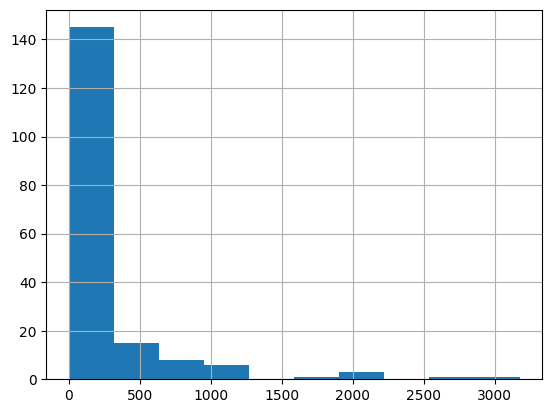

In [ ]:
ger_rem_final['Remittances sent from Germany (in million U.S. dollars)'].hist(bins=10)

In [26]:
#code adapted from AOK's folium.ipynb and ChatGPT
import folium

style_function = lambda x: {'fillColor': '#ffffff', #it makes it look cleaner without nasty default blue thick borders
                            'color':'#000000',
                            'fillOpacity': 0.1,
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', #it highlights polygon when hover over
                                'color':'#000000',
                                'fillOpacity': 0.50,
                                'weight': 0.1}

map = folium.Map(location=[20, 30], zoom_start=4)
folium.Choropleth(
    geo_data=ger_rem_final,
    data= ger_rem_final,
    columns=['NAME_EN','Remittances sent from Germany (in million U.S. dollars)'],
    key_on= 'feature.properties.NAME_EN',
    fill_color='Greens',
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Remittances sent from Germany (in million U.S. dollars)',
    bins=[0, 500, 1500, 2500, 3500]
).add_to(map)

folium.GeoJson(
    ger_rem_final,
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 0.5, 'opacity': 1},
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME_EN', 'Remittances sent from Germany (in million U.S. dollars)'],
        aliases=['Country: ', 'Remittances sent from Germany (million USD): '],
        localize=True
    )
).add_to(map)

title_html = ''' Remittances sent from Germany (in million U.S. dollars) '''
map.get_root().html.add_child(folium.Element(title_html))

#map

### Interpretation of the Maps

The two maps above show the origin countries of foreign born people living in Germany as well as the remittances sent from Germany to other countries. Something that stands out in the first map, is that the two countries with the by far largest population living in Germany are Turkey and the Ukraine, closely followed by Romania, Poland, and Syria. However, of these countries, only Romania and Poland also have very high rates of remittances. This difference is very easily explained by the fact that Romania and Poland are part of the EU, which is not currently the case for Turkey, Ukraine, and Syria. The fact that an EU citizenship makes it easier to work in Germany is demonstrated clearly by the fact that all countries with the highest rates of remittances are also part of the EU. However, there are also several countries, such as China and India, that do not have very high numbers of people living in Germany, at least compared to other countries, but still have relatively high rates of remittances.

The amount of remittances sent from Germany can be explained by many factors, such as ability to work in Germany, immigration status, and reason for immigration, so it would be interesting to map such factors as well. However, what the map of remittances does tell us, is that almost all countries with a high number of people living in Germany also send back sigificant amounts of money in remittances. This is an important fact, especially considering that the workforce of German citizens is shrinking with demogrpahic change.